<a href="https://colab.research.google.com/github/CodeHunterOfficial/NLP/blob/main/Lecture_4_%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D1%81%D0%BC%D1%8B%D1%81%D0%BB%D0%B0_%D1%81%D0%BB%D0%BE%D0%B2_%D0%BF%D0%BE_%D0%B8%D1%85_%D1%87%D0%B0%D1%81%D1%82%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8F%D0%BC_%D1%81%D0%B5%D0%BC%D0%B0%D0%BD%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##План:
* Создание векторов тем с помощью анализа семантики (смысла). 
* Семантический поиск на основе сходства векторов тем. 
*  Масштабируемый семантический анализ и семантический поиск для больших корпусов текстов. 
* Семантические компоненты (темы) как признаки в конвейере NLP. 
* Ориентация в векторных пространствах высокой размерности.

Подбор числового представления семантики (смысла) слов и предложений — непростая задача, особенно для «нечетких» языков, таких как английский, с множеством диалектов и различных значений одного слова. Даже написание текста профессоромлингвистом не отменяет наличия у большинства слов английского языка нескольких значений — головная боль для учащихся — как людей, так и машин. Концепция нескольких значений у слов называется многозначностью (polysemy). 


* Многозначность — существование слов и фраз, у которых более одного смысла. Многозначность может влиять на семантику слов или высказываний по-разному. Мы перечислим эти варианты ниже, чтобы вы оценили всю широту возможностей LSA. Не стоит волноваться об этих сложностях, LSA берет их на себя. 
* Омонимы — слова с одинаковым написанием и произношением, но различным смыслом. 
* Зевгма — использование в одном предложении сразу двух значений одного слова. LSA способен справиться с некоторыми сложными задачами, возникающими вследствие многозначности в голосовом интерфейсе — при использовании голосовых чат-ботов, например Alexa или Siri. 
* Омографы — слова с одинаковым написанием, но различным произношением и смыслом. 
* Омофоны — слова с одинаковым произношением, но различным написанием и смыслом (непростая задача для NLP в случае голосового интерфейса). 

Представьте, как сложно было бы обработать следующее высказывание, не будь таких инструментов, как LSA: She felt … less. She felt tamped down. Dim. More faint. Feint. Feigned. Fain (Патрик Ротфус). 

С учетом этих непростых задач как бы вы втиснули вектор TF-IDF из миллиона измерений (термов) в вектор из примерно 200 измерений (тем)? Это словно искать сочетание основных цветов, которое бы давало такой оттенок, как в вашей квартире, чтобы закрасить отверстия от гвоздей в стене. 

Необходимо найти «соответствующие» друг другу в теме измерения слов и сложить их векторы TF-IDF. В результате получится новое число, отражающее долю данной темы в документе. Можно даже умножить их на веса, отражающие их важность для темы в целом, степень вложения каждого отдельного слова в «смесь», а для слов, снижающих вероятность того, что текст посвящен данной теме, можно использовать отрицательные веса.


## Мысленный эксперимент

## Пример.
Предположим, для определенного документа имеется вектор TF-IDF, и мы хотим преобразовать его в вектор темы. Представьте, насколько каждое слово влияет на тему документа.
Предположим, мы обрабатываем несколько предложений о домашних животных в Центральном парке Нью-Йорка (NYC). Мы создали 3 темы: одну, связанную с домашними животными, одну, связанную с животными, и одну, связанную с городами. Мы можем назвать эти темы соответственно "petness” “animalness", “cityness”. Таким образом, тема “petness” будет давать высокие оценки таким словам, как “cat" и "dog", но, скорее всего, проигнорирует такие слова, как «NYC» и "apple". Тема "city" игнорирует такие слова, как "cat" и "dog", но может дать "apple" несколько очков из-за лиги «Big Apple».

Посмотрите на код:

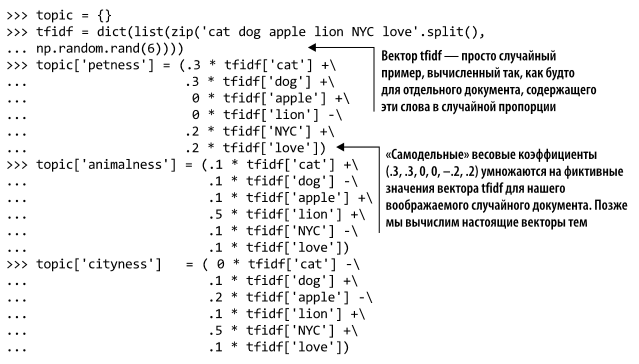

In [2]:
import numpy as np
topic={}
# Этот вектор tfidf является случайным примером, как если бы
# Рассчитывается для документа со случайными пропорциями этих слов
tfidf=dict(list(zip('cat dog apple lion NYC love'.split(), np.random.rand(6))))
print(tfidf)

{'cat': 0.8607962317131701, 'dog': 0.6904316906445224, 'apple': 0.11200438668891777, 'lion': 0.5141858351308882, 'NYC': 0.7858497497897512, 'love': 0.14551537000783255}


Вручную установить веса (0,3, 0,3, 0, 0, -0,2, 0,2)
 Умножьте на фиктивное значение tfidf выше, чтобы создать векторы тем для фиктивных случайных документов.

In [3]:
topic['petness'] = (.3 * tfidf['cat'] + .3 * tfidf['dog'] + 0 * tfidf['apple'] + 0 * tfidf['lion'] - .2 * tfidf['NYC'] + .2 * tfidf['love'])
topic['animalness'] = (.1 * tfidf['cat'] + .1 * tfidf['dog'] - .1 * tfidf['apple'] + .5 * tfidf['lion'] + .1 * tfidf['NYC'] - .1 * tfidf['love'])
topic['cityness'] = ( 0 * tfidf['cat'] - .1 * tfidf['dog'] + .2 * tfidf['apple'] - .1 * tfidf['lion'] + .5 * tfidf['NYC'] + .1 * tfidf['love'])
print(topic)

{'petness': 0.337301500750924, 'animalness': 0.46504870911051344, 'cityness': 0.3094155366559014}


 Отношения между словами и темами могут быть перевернуты. 3 тематических векторных набора
 
  Результирующая матрица 3 × 6 может быть транспонирована для получения тематических весов для каждого слова в словаре.
 
 Рассчитать тематический вес слова

In [4]:
word_vector = {}
word_vector['cat'] = .3*topic['petness'] + .1*topic['animalness'] +  0*topic['cityness']
word_vector['dog'] = .3*topic['petness'] +  .1*topic['animalness'] -  .1*topic['cityness']
word_vector['apple']= 0*topic['petness'] -  .1*topic['animalness'] +  .2*topic['cityness']
word_vector['lion'] = 0*topic['petness'] +  .5*topic['animalness'] -  .1*topic['cityness']
word_vector['NYC'] = -.2*topic['petness'] +  .1*topic['animalness'] + .5*topic['cityness']
word_vector['love'] = .2*topic['petness'] -  .1*topic['animalness'] +  .1*topic['cityness']
print(word_vector)

{'cat': 0.14769532113632855, 'dog': 0.11675376747073841, 'apple': 0.015378236420128928, 'lion': 0.20158280088966657, 'NYC': 0.13375233908881723, 'love': 0.051896982904723596}


В этом мысленном эксперименте мы сложили частотности слов, которые могут указывать на каждую из наших тем. Задали веса для частотностей слов (значений TF-IDF) в зависимости от того, насколько слово связано с конкретной темой. То же самое, только со знаком минус сделали для слов, указывающих на нечто в каком-то смысле противоположное теме. Конечно, это не настоящий анализ алгоритма или пример реализации, а просто мысленный эксперимент. В нем мы пытаемся понять, как обучить машину думать так, как человек. Мы произвольно разбиваем слова и документы всего на три темы (petness, animalness и cityness). Да и словарь ограничен шестью словами. 

Следующий шаг: разобраться, как бы человек мог математически определить, какие темы и слова связаны и какие веса должны быть у этих связей. После выбора трех тем для модели, необходимо подобрать веса всех слов для этих тем. Мы смешали слова в таком соотношении друг к другу, чтобы превратить тему в «смешение цветов». Преобразование тематического моделирования (рецепт смешения цветов) представляет собой матрицу соотношений (весов) 3 × 6, задающую соответствия трех тем и шести слов. Мы умножили эту матрицу на воображаемый вектор TF-IDF 6 × 1 и получили вектор темы 3 × 1 для данного документа. 

Связи между словами и темами можно «отобразить зеркально». Нужно транспонировать матрицу 3 × 6 трех векторов тем и получить веса тем для всех слов словаря. Эти векторы весов будут векторами для наших шести слов: 

In [41]:
word_vector = {}
word_vector['cat']  =  .3*topic['petness'] +\
                        .1*topic['animalness'] +\
                         0*topic['cityness']
word_vector['cat']               

0.14769532113632855

In [42]:
word_vector['dog']  =  .3*topic['petness'] +\
                        .1*topic['animalness'] -\
                        .1*topic['cityness']
word_vector['dog']

0.11675376747073841

In [5]:
word_vector['apple']=   0*topic['petness'] -\
                        .1*topic['animalness'] +\
                        .2*topic['cityness']
word_vector['apple']

0.015378236420128928

In [6]:
word_vector['lion'] =   0*topic['petness'] +\
                        .5*topic['animalness'] -\
                        .1*topic['cityness']
word_vector['lion']

0.20158280088966657

In [7]:
word_vector['NYC']  = -.2*topic['petness'] +\
                        .1*topic['animalness'] +\
                        .5*topic['cityness']
word_vector['NYC']

0.13375233908881723

In [8]:
word_vector['love'] =  .2*topic['petness'] -\
                        .1*topic['animalness'] +\
                        .1*topic['cityness']
word_vector['love'] 

0.051896982904723596

Эти шесть векторов (показанные на рис. 4.1), по одному для каждого слова, отражают значения наших шести слов в виде трехмерных векторов.

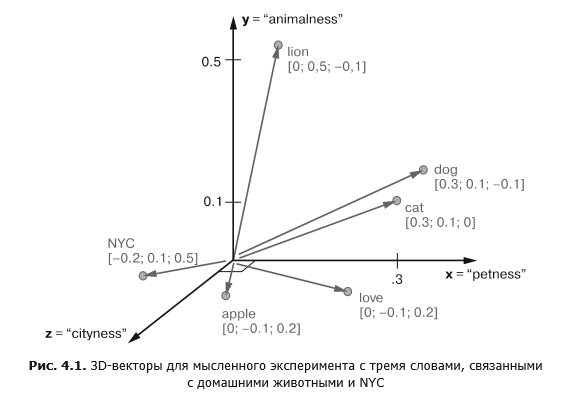

## LDA-классификатор

LDA — одна из самых простых и быстродействующих моделей понижения размерности и классификации. Скорее всего, эта книга — практически единственное место, где можно о ней прочитать, поскольку данный метод не слишком «раскручен». Но во многих приложениях его точность намного выше, чем у более навороченных современных алгоритмов, опубликованных в недавних статьях. LDA-классификатор — алгоритм обучения с учителем, так что нам понадобятся метки для классов документов. Но число требуемых для LDA выборок намного меньше, чем для упомянутых навороченных алгоритмов. 

В этом примере мы приведем упрощенную реализацию LDA, которой нет в библиотеке scikit-learn. Обучение модели состоит лишь из трех шагов, так что их можно произвести непосредственно на Python. 

* Вычислить среднее местоположение (центроид) всех векторов TF-IDF, входящих в класс (например, являющихся спамом СМС). 

*  Вычислить среднее местоположение (центроид) всех векторов TF-IDF, не входящих в класс (например, не являющихся спамом СМС). 

* Вычислить разность векторов между центроидами (связывающую их напрямую)

Для обучения модели LDA достаточно найти вектор (прямую) между центроидами бинарного класса. LDA — алгоритм машинного обучения с учителем, так что для сообщений нужны метки. Для выполнения вывода (предсказания) с помощью этой модели достаточно выяснить, ближе ли новый вектор TF-IDF к центроиду векторов, входящих в класс (спам), или к центроиду не входящих (не спам). Сначала обучим LDA-модель классифицировать СМС как спам или не спам (листинг 4.1).


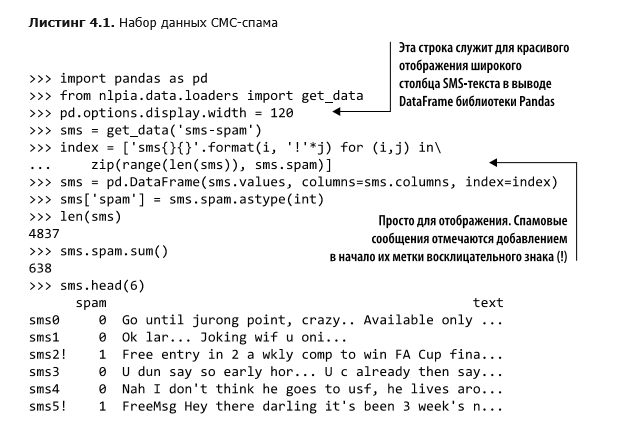

In [9]:
import pandas as pd
pd.options.display.width = 120
DATA_DIR = ('https://gitlab.com/tangibleai/nlpia/-/raw/master/src/nlpia/data')
url= DATA_DIR + '/toxic_comment_small.csv'
comments = pd.read_csv(url)
index = ['comment{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(comments)), comments.toxic)]
comments = pd.DataFrame(comments.values, columns=comments.columns, index=index)
mask = comments.toxic.astype(bool).values
comments['toxic'] = comments.toxic.astype(int)
len(comments)

5000

In [10]:
comments.toxic.sum()

650

In [11]:
comments.head(6)

,text,toxic
comment0,you have yet to identify where my edits violat...,0
comment1,"""\n as i have already said,wp:rfc or wp:ani. (...",0
comment2,your vote on wikiquote simple english when it ...,0
comment3,your stalking of my edits i've opened a thread...,0
comment4!,straight from the smear site itself. the perso...,1
comment5,"no, i can't see it either - and i've gone back...",0


Итак, у нас 5000 сообщений, 650 из которых были маркированы меткой бинарного класса spam. Теперь выполним токенизацию и преобразование векторов TF-IDF для всех этих СМС: 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_tokenize(sentence):
    return [token.text for token in nlp(sentence.lower())]

tfidf_model = TfidfVectorizer(tokenizer=spacy_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=comments.text).toarray()
tfidf_docs.shape

(5000, 19160)

In [13]:
comments.toxic.sum()

650

В результате применения nltk.casual_tokenizer в нашем словаре оказывается 19160 слова — почти вдвое больше, чем сообщений. И почти в десять раз больше слов, чем спамовых сообщений. Так что у модели не так много информации о словах, которая бы указывала, является сообщение спамом или нет. Обычно наивный байесовский классификатор работает плохо, если словарь намного больше числа маркированных примеров в наборе данных. Здесь помогут методы семантического анализа, изложенные в этой главе. 

Начнем с простейшего метода семантического анализа — LDA. Можно воспользоваться моделью LDA из sklearn.discriminant_analysis.LinearDiscriminantAnalysis. Но для обучения модели достаточно вычислить центроиды бинарного класса (спам и не спам), так что можно сделать это вручную:


In [14]:
mask = comments.toxic.astype(bool).values
toxic_centroid = tfidf_docs[mask].mean(axis=0)
nontoxic_centroid = tfidf_docs[~mask].mean(axis=0)
mask

array([False, False, False, ...,  True,  True, False])

In [15]:
toxic_centroid

array([0.01406157, 0.00363202, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [16]:
nontoxic_centroid

array([1.89710535e-02, 4.58793799e-03, 2.57451586e-04, ...,
       2.47852092e-05, 1.78452160e-05, 6.71831573e-05])

In [17]:
centroid_axis = toxic_centroid - nontoxic_centroid
toxicity_score = tfidf_docs.dot(centroid_axis)
toxicity_score.round(3)

array([-0.008, -0.022, -0.014, ..., -0.025, -0.001, -0.022])

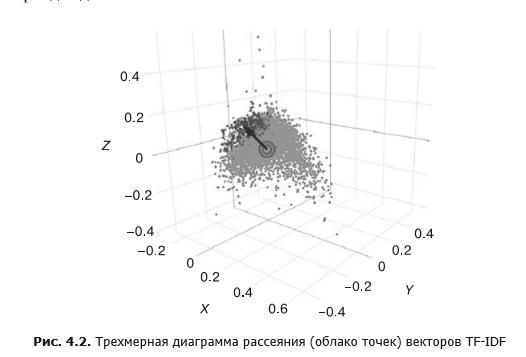

In [18]:
from sklearn.preprocessing import MinMaxScaler
comments['manual_score'] = MinMaxScaler().fit_transform(toxicity_score.reshape(-1,1))
comments['manual_predict'] = (comments.manual_score > .5).astype(int)
comments['toxic manual_predict manual_score'.split()].round(2).head(6)

,toxic,manual_predict,manual_score
comment0,0,0,0.41
comment1,0,0,0.27
comment2,0,0,0.35
comment3,0,0,0.47
comment4!,1,0,0.48
comment5,0,0,0.31


Выглядит хорошо. Все шесть первых сообщений были классифицированы правильно при пороговом значении 50 %. Посмотрим, что получится на остатке тренировочного набора данных: 

In [19]:
(1. - (comments.toxic - comments.manual_predict).abs().sum() / len(comments)).round(3)

0.894

Ух ты! С помощью этой простой модели удалось правильно классифицировать 81.8% сообщений. На практике вряд ли удастся добиться такого результата, поскольку здесь мы не выделили тестовый набор данных. Модель получила отметку «5 с плюсом» на уже виденных классификатором «экзаменационных вопросах». Но LDA — очень простая модель с небольшим числом параметров, так что она должна легко поддаваться обобщению, если ваши СМС будут соответствовать тем сообщениям, которые планируется классифицировать. Запустите ее на ваших собственных примерах. Или, еще лучше, загляните в приложение Д и узнайте, как произвести так называемую кросс-валидацию. 

Таковы возможности методов семантического анализа. В отличие от наивного байесовского классификатора и модели логистической регрессии семантический анализ не основывается на отдельных словах1. Он собирает слова со схожей семантикой (например, спамовостью) и использует их вместе. Помните, что словарь данного тренировочного набора ограничен и включает некоторые не английские слова. Так что для правильной классификации ваши контрольные сообщения должны использовать подобный же словарный запас. 

Взглянем, как выглядит матрица различий для тренировочного набора данных. Она демонстрирует, сколько отмеченных как спам СМС на самом деле им не были (ложноположительные результаты) и сколько помеченных как не спам следовало пометить как спам (ложноотрицательные результаты): 

In [20]:
!pip install pugnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 706 kB 29.3 MB/s 
     |████████████████████████████████| 210 kB 65.0 MB/s 
     |████████████████████████████████| 120 kB 62.1 MB/s 
     |████████████████████████████████| 1.6 MB 44.2 MB/s 
     |████████████████████████████████| 175 kB 59.2 MB/s 
     |████████████████████████████████| 2.2 MB 44.8 MB/s 
     |████████████████████████████████| 82 kB 910 kB/s 


In [21]:
from pugnlp.stats import Confusion 
Confusion(comments['toxic manual_predict'.split()])

/usr/local/lib/python3.7/dist-packages/pugnlp/constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
/usr/local/lib/python3.7/dist-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
/usr/local/lib/python3.7/dist-packages/pugnlp/tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/pugnlp/util.py:80: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/pugnl

manual_predict,0,1
toxic,,
0,4182,168
1,360,290


Выглядит неплохо. Если ложноположительных (774) или ложноотрицательных (136) результатов непропорционально много, можно изменить пороговое значение 0.5. Теперь вы подготовлены к рассказу о моделях, умеющих вычислять многомерные семантические векторы вместо одномерных семантических показателей. До сих пор наши одномерные векторы понимали только, является слово/документ спамом или нет. Мы обучим их понимать гораздо больше нюансов слов и предоставим вам многомерный вектор, захватывающий смысл слова. Прежде чем углубиться в SVD (математические основы многомерного LSA), мы упомянем еще несколько подходов.

##Еще один «дальний родственник» 

Как уже говорилось, у LSA есть еще один «дальний родственник» с похожей аббревиатурой — LDiA. Расшифровывается как латентное размещение Дирихле (latent Dirichlet allocation)1. Можно также применять для генерации векторов, захватывающих семантику слова или документа. 

LDiA применяет математику LSA по-другому. Для группировки слов в нем используется нелинейный статистический алгоритм. В результате обучение занимает намного больше времени, чем при линейных подходах, таких как LSA. Из-за этого LDiA часто оказывается менее подходящим для многих реальных приложений, и его редко имеет смысл пробовать первым. Но создаваемые им сводные показатели тем иногда точнее отражают интуитивные представления человека относительно слов и тем. Так что полученные с помощью LDiA темы будет проще объяснить своему начальнику. 

LDiA полезен для решения некоторых однодокументных задач, например для автоматического реферирования документов. Документ играет роль корпуса, а предложения в этом корпусе — документов. Именно так gensim и другие пакеты используют LDiA для обнаружения наиболее важных предложений документа. Далее путем соединения этих предложений можно создать машинно-генерируемый реферат документа2. Для большинства задач классификации и регрессии лучше подойдет LSA. Так что мы расскажем сначала про LSA и лежащую в его основе линейную алгебру SVD.


## Воплощаем мысленный эксперимент  на практике 

Воспользуемся алгоритмом для вычисления каких-нибудь тем, например animalness, petness и cityness из нашего мысленного эксперимента. Мы не можем сообщить алгоритму LSA, к чему относятся эти темы1. Просто попробуем и посмотрим, что получится. Захват семантики коротких документов вроде твитов, сообщений в чате или строк стихотворений из маленького корпуса требует всего нескольких измерений (тем) (листинг 4.2).


In [43]:
!pip install nlpia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from nlpia.book.examples.ch04_catdog_lsa_3x6x16 import word_topic_vectors
word_topic_vectors.T.round(1) 

,cat,dog,apple,lion,nyc,love
top0,-0.6,-0.4,0.5,-0.3,0.4,-0.1
top1,-0.1,-0.3,-0.4,-0.1,0.1,0.8
top2,-0.3,0.8,-0.1,-0.5,0.0,0.1


Строки в этой матрице тем-слов представляют собой векторы тем-слов или просто векторы тем для всех слов. Они аналогичны оценкам слов из модели анализа тональностей в главе 2. Эти векторы можно использовать для представления смысла слов в любом конвейере машинного обучения; иногда их называют семантическими векторами, а путем сложения векторов тем для отдельных слов можно вычислить вектор темы для всего документа. 

Созданные SVD векторы тем аналогичны придуманным нами в мысленном эксперименте. Первая тема, маркированная top0, немного похожа на вышеупомянутую тему cityness. Веса для apple и NYC в теме top0 больше. Но top0 идет первой в LSA и последней в списке наших придуманных тем. LSA сортирует темы по важности, то есть объему представляемой ими информации или дисперсии в наборе данных. Измерение topic0 расположено вдоль осей наибольшей дисперсии в наборе данных. Высокая дисперсия по городам заметна при наблюдении нескольких предложений о NYC и apple и нескольких, которые вообще не включают этих слов. 

А top1 выглядит иначе, чем все темы из мысленного эксперимента. Алгоритм LSA обнаружил, что для захвата сущности документов, на которых он был запущен, тема love важнее, чем animalness. Последняя тема, top2, похоже, относится к собакам (dog) с небольшой толикой любви (love). cat низведено до уровня темы anti-cityness, поскольку кошки и города нечасто упоминаются вместе.

Разобраться лучше в работе LSA (этот алгоритм создает векторы тем, не понимая, что означают слова) нам поможет еще один мысленный эксперимент.


**Mad Libs **

Догадаетесь ли вы из контекста, что означает awas в следующем высказывании: **Awas! Awas! Tom is behind you! Run!?** 

Вы не угадаете, что Том — альфа-орангутанг из парка Лики на Борнео. И вы вряд ли знаете, что Том был приучен к людям, но привык защищать свою территорию, иногда излишне агрессивно. И вашему внутреннему обработчику естественного языка может не хватить времени, чтобы полностью осознать смысл awas, пока вы будете убегать в безопасное место.

Но когда вы переведете дыхание и подумаете, то можете предположить, что awas означает «опасность» или «осторожно» на индонезийском языке. Игнорируя реальный мир и концентрируя внимание на одном только языковом контексте, словах, часто можно перенести значение (смысл) известных вам слов на неизвестные. 

Попробуйте это как-нибудь сами или с друзьями. Как и в игре Mad Libs (https:// en.wikipedia.org/wiki/Mad_Libs), просто замените слово в предложении соответствующим иноязычным или даже выдуманным словом. Затем попросите друга угадать, что это слово значит, или заполнить пропуск английским аналогом. Зачастую догадка вашего друга окажется не столь уж далека от правильного перевода иноязычного или предполагаемого значения выдуманного слова. 


У машин, начинающих работу с чистого листа, нет знаний языка по умолчанию. Так что им требуется несколько примеров, чтобы понять, что значат слова в них. Это все равно что вы смотрите на предложение, полное иноязычных слов. Но машины неплохо справляются с этой задачей с помощью LSA при наличии только случайной выборки документов, содержащих всего несколько упоминаний интересующих вас слов. 

Как видите, более короткие документы, например предложения, подходят лучше статей или книг. Дело в том, что смысл слова обычно тесно связан со значениями других слов в содержащем его предложении, но отнюдь не со значениями далеко стоящих от него слов в пределах длинного документа.

LSA — способ обучить машину распознавать смысл (семантику) слов и фраз по примерам их использования. Подобно людям, машины намного быстрее и легче обучаются семантике на примерах применения слов, чем на словарных определениях. Для извлечения смысла из примеров требуется меньше логических рассуждений, чем для чтения всех возможных определений и форм слов из словаря и превращения их в логику. 

Математический метод, с помощью которого в LSA раскрывается смысл слов, называется сингулярным разложением. Для создания векторов наподобие тех,которые встречались нам только что в матрицах «слово — тема»1, LSA использует SVD, знакомый вам по курсу линейной алгебры. 

Вы увидите NLP в действии: сейчас продемонстрируем, как машина «играет в Mad Libs», понимая значение слов.


##Сингулярное разложение

 Именно алгоритм сингулярного разложения лежит в основе LSA. Начнем с корпуса из всего 11 документов и словаря из шести слов, подобного тому, что был в нашем мысленном эксперименте

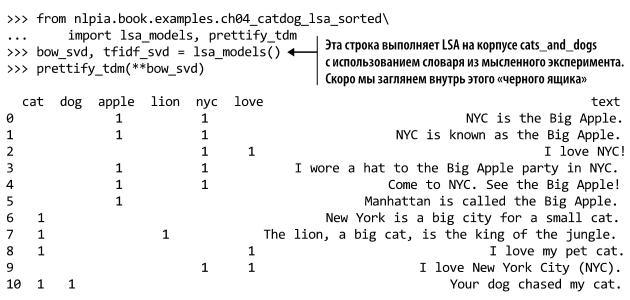

In [45]:
from  nlpia.book.examples.ch04_catdog_lsa_sorted import lsa_models,prettify_tdm
bow_svd, tfidf_svd=lsa_models()
prettify_tdm(**bow_svd)

100%|██████████| 263/263 [00:00<00:00, 254112.41it/s]


,cat,dog,apple,lion,nyc,love,text
0,,,1,,1,,NYC is the Big Apple.
1,,,1,,1,,NYC is known as the Big Apple.
2,,,,,1,1,I love NYC!
3,,,1,,1,,I wore a hat to the Big Apple party in NYC.
4,,,1,,1,,Come to NYC. See the Big Apple!
5,,,1,,,,Manhattan is called the Big Apple.
6,1,,,,,,New York is a big city for a small cat.
7,1,,,1,,,"The lion, a big cat, is the king of the jungle."
8,1,,,,,1,I love my pet cat.
9,,,,,1,1,I love New York City (NYC).


Полученные результаты представляют собой матрицу «документ — терм», каждая строка которой — это вектор набора слов документа.

 Мы ограничили словарь в соответствии с мысленным экспериментом. И ограничили корпус всего 11 документами, использующими шесть слов из нашего словаря. К сожалению, работа алгоритма сортировки и ограниченность словаря привели к появлению нескольких идентичных векторов мультимножеств (NYC, apple). Но SVD должен обнаружить это и отвести для этой пары слов свою тему. 

Сначала мы применим SVD к матрице «терм — документ» (полученной в результате транспонирования вышеприведенной матрицы «документ — терм»), но он может работать и на матрицах TF-IDF или на любой другой модели векторного про странства:


In [31]:
tdm = bow_svd['tdm']
tdm

,0,1,2,3,4,5,6,7,8,9,10
cat,0,0,0,0,0,0,1,1,1,0,1
dog,0,0,0,0,0,0,0,0,0,0,1
apple,1,1,0,1,1,1,0,0,0,0,0
lion,0,0,0,0,0,0,0,1,0,0,0
nyc,1,1,1,1,1,0,0,0,0,1,0
love,0,0,1,0,0,0,0,0,1,1,0


SVD — алгоритм для разложения любой матрицы на три множителя, то есть три матрицы, в результате перемножения которых получится исходная матрица. Это аналогично разбиению большого числа на три множителя. Но наши множители не скалярные значения, а настоящие двумерные матрицы с особыми свойствами. У вычисляемых нами с помощью SVD трех матричных множителей есть несколько полезных математических свойств, пригодных для понижения размерности и метода LSA. В курсе линейной алгебры вам приходилось использовать SVD для обращения матрицы. Здесь он пригодится, чтобы LSA определил, какими должны быть темы (группы связанных слов). 

При каждом запуске алгоритма SVD для матрицы «терм — документ» BOW или матрицы «терм — документ» TF-IDF SVD находит подходящие друг к другу сочетания слов. Для поиска этих встречающихся рядом слов SVD вычисляет корреляцию между столбцами (термами) матрицы «терм — документ»1. SVD одновременно находит корреляцию использования термов в документах и корреляцию документов друг с другом. На основе этой информации SVD также вычисляет линейные комбинации термов с максимальной дисперсией в пределах корпуса. Такие комбинации частотностей термов и станут нашими темами. И мы оставим только темы, вмещающие максимум информации и дисперсии в корпусе. Кроме того, обеспечивается возможность линейных преобразований (поворотов) векторов «терм — документ» для преобразования их в более короткие векторы тем для каждого из документов. 

SVD сгруппирует термы с высокой корреляцией (поскольку они часто встречаются в одних и тех же документах), а также варьируются одновременно в наборе документов. Мы будем рассматривать эти линейные сочетания слов как темы, которые превращают наши векторы BOW (или векторы TF-IDF) в векторы тем, указывающие, к каким темам относится документ. Вектор темы представляет собой резюме (обобщение) содержания документа.


Трудно сказать, кому первому пришла в голову идея применения SVD к частотностям слов для создания векторов тем. Несколько лингвистов одновременно работали над схожими методиками. Они все обнаружили, что семантическое подобие двух выражений (или отдельных слов) естественного языка пропорционально подобию контекстов, в которых они используются. В числе этих исследователей З. С. Харрис (1951), М. Коль (1979), Исбел (1998), Дюмей (1988), Сэлтон, Леск (1965) и Дирвестер (1990). На математическом языке SVD (основа LSA) выглядит следующим образом: 

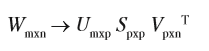

где: m — число термов в словаре, n — количество документов в корпусе, а p — сумма тем в корпусе, равная числу слов. Погодите, разве мы не хотели уменьшить число измерений? Нам нужно, чтобы тем в итоге было меньше, чем слов, так что можно воспользоваться этими векторами тем (строками матрицы «терм — документ») в качестве понижающего размерность представления исходных векторов TF-IDF. В итоге мы добьемся этого. Но для начала оставим на месте все измерения матриц. 

In [148]:
#import  nlpia.book.examples.ch04_catdog_lsa_sorted 
#nlpia.book.examples.ch04_catdog_lsa_sorted.prettify_tdm

### U — левые сингулярные векторы 

U-матрица содержит матрицу «терм — тема», указывающую, какие «друзья есть у слова». Ее называют матрицей левых сингулярных векторов, поскольку она содержит векторы-строки, которые необходимо умножить слева на матрицу векторов-столбцов8. U-матрица отражает взаимную корреляцию слов и тем на основе совместной встречаемости слов в одном документе. До начала усечения (удаления столбцов) она является квадратной. Количество столбцов и строк в ней равно числу слов в нашем словаре (m): шесть. У нас все еще шесть тем (p), поскольку мы пока не усекали эту матрицу (листинг 4.3).
Листинг ниже. 

Матрица $U_{mxp}$

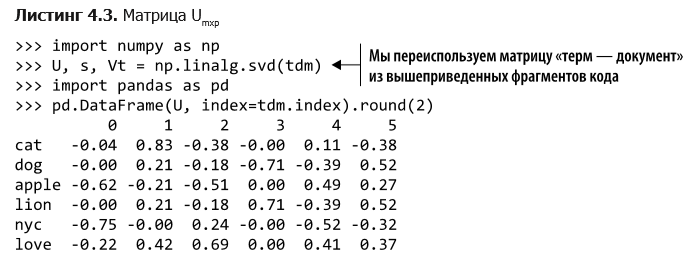

In [47]:
import numpy as np
U,s,Vt=np.linalg.svd(tdm)
print(U,s,Vt)

[[-3.97556178e-02  8.34057656e-01 -3.81851767e-01 -2.36088305e-16
   1.12956969e-01 -3.79733154e-01]
 [-4.47829266e-03  2.08514414e-01 -1.78460107e-01 -7.07106781e-01
  -3.90367865e-01  5.21791725e-01]
 [-6.17385624e-01 -2.08514414e-01 -5.13475593e-01  2.64627630e-16
   4.89451262e-01  2.68583336e-01]
 [-4.47829266e-03  2.08514414e-01 -1.78460107e-01  7.07106781e-01
  -3.90367865e-01  5.21791725e-01]
 [-7.52809940e-01  6.24500451e-16  2.38804176e-01 -2.77555756e-16
  -5.24858205e-01 -3.17448617e-01]
 [-2.24703284e-01  4.17028828e-01  6.85425845e-01  3.04822960e-16
   4.09179557e-01  3.71966250e-01]] [3.14283392 2.23606798 1.77192093 1.         0.84299447 0.52177724] [[-4.35974537e-01 -4.35974537e-01 -3.11029233e-01 -4.35974537e-01
  -4.35974537e-01 -1.96442332e-01 -1.26496082e-02 -1.40745301e-02
  -8.41466359e-02 -3.11029233e-01 -1.40745301e-02]
 [-9.32504808e-02 -9.32504808e-02  1.86500962e-01 -9.32504808e-02
  -9.32504808e-02 -9.32504808e-02  3.73001923e-01  4.66252404e-01
   5.59502

In [48]:
import pandas as pd
pd.DataFrame(U, index=tdm.index).round(2)

,0,1,2,3,4,5
cat,-0.04,0.83,-0.38,-0.00,0.11,-0.38
dog,-0.00,0.21,-0.18,-0.71,-0.39,0.52
apple,-0.62,-0.21,-0.51,0.00,0.49,0.27
lion,-0.00,0.21,-0.18,0.71,-0.39,0.52
nyc,-0.75,0.00,0.24,-0.00,-0.52,-0.32
love,-0.22,0.42,0.69,0.00,0.41,0.37


Обратите внимание, что алгоритм SVD — обычная математическая операция NumPy, а не экзотический алгоритм машинного обучения Scikit-Learn. 

U-матрица включает в виде столбцов векторы тем для всех слов корпуса. Это значит, что ее можно использовать для преобразования вектора «слово — документ» (вектора TF-IDF или вектора BOW) в вектор «тема — документ». Для получения нового вектора «тема — документ» необходимо просто умножить матрицу U «тема — слово» на любой вектор «слово — документ». Дело в том, что веса (оценки) в ячейках U-матрицы отражают важность слов для тем. Именно это мы и делали в мысленном эксперименте, с которого началась вся наша затея с кошками и собаками в Нью-Йорке.


## S — сингулярные значения

Квадратная диагональная S-матрица (сигма-матрица) содержит сингулярные значения темы. Эти сингулярные значения указывают, сколько информации захвачено каждым из измерений нашего нового семантического (тематического) векторного пространства. В диагональной матрице ненулевые значения располагаются только на диагонали от верхнего левого угла до нижнего правого. На всех остальных позициях в S-матрице находятся нули. Так что NumPy экономит место за счет возврата сингулярных значений в виде массива, который легко можно преобразовать в диагональную матрицу с помощью функции numpy.diag, как показано в листинге ниже:

In [49]:
s.round(1) 
np.array([3.1, 2.2, 1.8, 1. , 0.8, 0.5]) 
S = np.zeros((len(U), len(Vt)))
pd.np.fill_diagonal(S, s)
pd.DataFrame(S).round(1) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


,0,1,2,3,4,5,6,7,8,9,10
0,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0


Подобно U-матрице, S-матрица для нашего корпуса из шести слов и шести тем состоит из шести строк (p). Но в ней намного больше столбцов (n), заполненных нулями. В ней должно быть по столбцу для каждого документа, чтобы ее можно было умножить на VT, матрицу «документ — документ», о которой мы расскажем далее. Поскольку мы пока не понизили размерность с помощью усечения этой диагональной матрицы, число тем (p) равно числу термов в словаре (m) — шести. Причем наши измерения (темы) устроены так, что первое измерение содержит больше всего информации (объяснимой дисперсии) о корпусе. Таким образом, при необходимости усечения тематической модели можно начать с измерений справа снизу и двигаться влево. И прекратить обнуление этих сингулярных значений тогда, когда погрешность тематической модели будет существенно влиять на общую погрешность конвейера NLP.

**СОВЕТ**
>А вот и упоминавшаяся выше хитрость. При работе с NLP, да и с большинством других приложений, не требуется хранить информацию о дисперсии в тематической модели. Документы, которые будут обрабатываться далее, могут быть посвящены совсем другим темам. 

>В большинстве случаев лучше задать диагональные элементы S -матрицы равными единице, получив в результате прямоугольную единичную матрицу, которая просто меняет форму матрицы «документ — документ» $V^ T$ так, чтобы она подходила к U -матрице «слово — тема». Таким образом, умножение S -матрицы на какой-либо новый набор векторов документов не перекосит векторы тем в сторону исходного набора (распределения) тем.


### $V^T$ — правые сингулярные вектор


$V^T$-матрица «документ — документ» содержит в качестве столбцов правые сингулярные векторы и дает информацию о разделяемых документами смыслах, поскольку измеряет частоту использования в документах одинаковых тем, в нашей новой семантической модели документов. Она содержит столько же строк (p) и столбцов, сколько документов в нашем маленьком корпусе 

In [149]:
pd.DataFrame(Vt).round(2) 

,0,1,2,3,4,5,6,7,8,9,10
0,-0.44,-0.44,-0.31,-0.44,-0.44,-0.20,-0.01,-0.01,-0.08,-0.31,-0.01
1,-0.09,-0.09,0.19,-0.09,-0.09,-0.09,0.37,0.47,0.56,0.19,0.47
2,-0.16,-0.16,0.52,-0.16,-0.16,-0.29,-0.22,-0.32,0.17,0.52,-0.32
3,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.71,-0.00,-0.00,-0.71
4,-0.04,-0.04,-0.14,-0.04,-0.04,0.58,0.13,-0.33,0.62,-0.14,-0.33
5,-0.09,-0.09,0.10,-0.09,-0.09,0.51,-0.73,0.27,-0.01,0.10,0.27
6,-0.57,0.21,0.11,0.33,-0.31,0.34,0.34,0.00,-0.34,0.23,0.00
7,-0.32,0.47,0.25,-0.63,0.41,0.07,0.07,0.00,-0.07,-0.18,0.00
8,-0.50,0.29,-0.20,0.41,0.16,-0.37,-0.37,-0.00,0.37,-0.17,0.00
9,-0.15,-0.15,-0.59,-0.15,0.42,0.04,0.04,-0.00,-0.04,0.63,-0.00


Как и S-матрицу, мы будем игнорировать $V^T$-матрицу при преобразовании новых векторов «слово — документ» в векторное пространство тем. Мы будем использовать ее только для проверки точности векторов тем и восстановления исходных векторов «слово — документ», применявшихся для ее обучения. 

##Ориентация SVD-матрицы 

Если вам случалось выполнять машинное обучение по документам на естественном языке, то вы могли заметить, что наша матрица «терм — документ» повернута набок (транспонирована) по сравнению с привычной вам по Scikit-Learn и другим пакетам. В модели тональностей наивного байесовского классификатора в конце лекции 2 и при работе с векторами TF-IDF из лекции 3 тренировочные наборы данных создавались в виде матрицы «документ — терм». Именно такой ориентации матрицы требуют модели Scikit-Learn. Каждая строка тренировочного набора данных в матрице «выборка — признак» для выборки машинного обучения соответствует документу. Каждый столбец отражает слово или признак этих документов. Но при выполнении операций линейной алгебры SVD напрямую матрицу нужно транспонировать в формат матрицы «терм — документ»

**ВАЖНО** 
>Мы называем матрицы и указываем их размеры сначала по строкам, а затем по столбцам. Так, «терм — документ» — это матрица, где строки представляют собой слова, а столбцы — документы. Аналогично и с измерениями (размерами) матриц. Матрица 2 × 3 состоит из двух строк и трех столбцов, то есть np.shape() у нее (2, 3), а len() — 2.


Не забудьте транспонировать свои матрицы «терм — документ» или «тема — документ» обратно в ориентацию Scikit-Learn перед обучением модели машинного обучения. В Scikit-Learn каждая из строк в тренировочном наборе данных NLP должна содержать вектор связанных с документом признаков (электронную почту, СМС, предложение, веб-страницу или любой другой фрагмент текста). В тренировочных наборах данных NLP векторы представляют собой векторы-строки, а при обычных операциях линейной алгебры векторы обычно рассматриваются как векторы-столбцы.

В следующем разделе мы подробно рассмотрим все это, когда будем обучать преобразователь TruncatedSVD из библиотеки scikit-learn превращать векторы наборов слов в векторы «документ — тема». Затем мы транспонируем эти векторы обратно для создания строк тренировочного набора данных, чтобы обучить на этих векторах «документ — тема» классификатор Scikit-Learn (sklearn).

**ВНИМАНИЕ** 
>При использовании Scikit-Learn необходимо транспонировать матрицу «признак — документ» (обычно называемую в Scikit-Learn X), чтобы создать матрицу документ-признак, передаваемую в методы .fit() и .predict() модели. Каждая строка в тренировочном наборе данных должна быть вектором признаков для конкретной выборки текста, обычно документа

### Усечение тем

У нас теперь есть тематическая модель — способ преобразования векторов частотностей слов в векторы весов тем. Но поскольку число тем равно числу слов, то количество измерений в модели нашего векторного пространства аналогично исходным векторам BOW. Мы просто создали новые слова и назвали их темами, так как в них слова сочетаются в различных соотношениях. Мы еще не понизили число размерностей. 

S-матрицу можно проигнорировать, поскольку столбцы и строки нашей U-матрицы уже упорядочены так, что наиболее важные темы (с наибольшими сингулярными значениями) находятся слева. Еще одна причина для игнорирования S-матрицы — большинство векторов «слово — документ», которые могут пригодиться для этой модели, например векторы TF-IDF, уже нормализованы. При этом получаются лучшие тематические модели.

 Начнем отрезать столбцы с правой стороны U-матрицы. Какого числа тем достаточно для захвата сути документа? Один из способов измерить точность LSA — проверить, насколько точно мы можем воссоздать матрицу «терм — документ» по матрице «тема — документ». В листинге  ниже мы построим график точности восстановления для матрицы из 9 термов и 11 документов, использовавшейся ранее для демонстрации SVD.

 Погрешность восстановления матрицы «терм — документ»

In [51]:
err = []
for numdim in range(len(s), 0, -1): 
  S[numdim - 1, numdim - 1] = 0
  reconstructed_tdm = U.dot(S).dot(Vt)
  err.append(np.sqrt(((reconstructed_tdm - tdm).values.flatten() ** 2).sum()/ np.product(tdm.shape)))
np.array(err).round(2)


array([0.06, 0.12, 0.17, 0.28, 0.39, 0.55])

При восстановлении матрицы «терм — документ» для наших 11 документов с помощью сингулярных векторов чем больше мы отбрасываем, тем выше погрешность. У вышеописанной модели с тремя темами была бы около 28 %, если бы мы воспользовались ею, чтобы восстановить векторы BOW для всех документов. На рис. ниже приведен график падения точности по мере отбрасывания все большего числа измерений в тематической модели.

Графики падения точности при использовании для модели векторов TF-IDF или BOW очень близки. Но первые покажут несколько лучшие результаты, если планируется оставить в модели всего несколько тем.


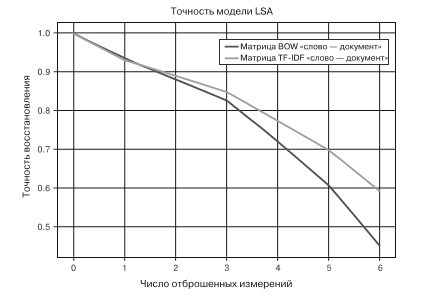

### PCA на трехмерных векторах 

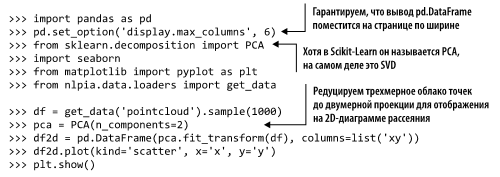

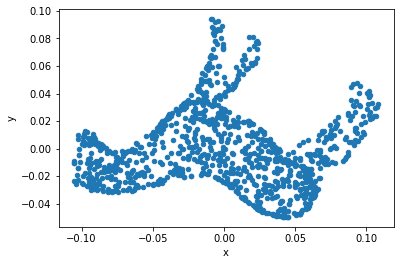

In [52]:
import pandas as pd
pd.set_option('display.max.columns', 6)
from sklearn.decomposition import PCA
import seaborn
from matplotlib import  pyplot as plt
from nlpia.data.loaders import get_data

df=get_data('pointcloud').sample(1000)
pca=PCA(n_components=2)
df2d=pd.DataFrame(pca.fit_transform(df), columns=list('xy'))
df2d.plot(kind='scatter', x='x', y='y')
plt.show()

In [53]:
cd = get_data('cats_and_dogs_sorted')

100%|██████████| 263/263 [00:00<00:00, 273518.96it/s]


In [54]:
cd

array(['NYC is the Big Apple.', 'NYC is known as the Big Apple.',
       'I love NYC!', 'I wore a hat to the Big Apple party in NYC.',
       'Come to NYC. See the Big Apple!',
       'Manhattan is called the Big Apple.',
       'New York is a big city for a small cat.',
       'The lion, a big cat, is the king of the jungle.',
       'I love my pet cat.', 'I love New York City (NYC).',
       'Your dog chased my cat.', 'Bright lights, big city?',
       "Simba, in Lion King, was inspired by Bambi who wasn't even a cat.",
       'Does your dog have a dog house?',
       'The cat steered clear of the dog house.', 'I love turtles.',
       'Bengi was a small stray dog with a fluffy tan spotted coat.',
       'The woman flew to NYC with her cat.',
       'That dog is a big animal. He must eat a lot.',
       'How big is New York? Is it a big city?',
       'The dog ran through Central Park in NYC.', 'Where is NYC?',
       "The Cat's Meow", 'The dog sat on the floor.',
       'The cat cha

In [55]:
data = pd.DataFrame(cd)
data.to_csv('cats_and_dogs_sorted.csv')

## Метод главных компонент 

Метод главных компонент — другое название SVD в случае его использования для понижения размерности, как мы делали при семантическом анализе выше. Модель PCA в Scikit-Learn включает несколько модификаций математики SVD, повышающих точность конвейера NLP. 

sklearn.PCA автоматически «центрирует» данные, вычитая средние значения частотностей слов. Более тонкая уловка: использование в PCA функции flip_sign для вычисления детерминистичным образом знаков сингулярных векторов. 

Реализация PCA из sklearn включает необязательный шаг «отбеливания». Оно напоминает уловку с игнорированием сингулярных значений при преобразовании векторов «слово — документ» в векторы «тема — документ». Вместо того чтобы просто делать все сингулярные значения в S-матрице равными единице, «отбеливание» делит данные на эти дисперсии аналогично преобразованию sklearn.StandardScaler. Это повышает «размазанность» данных и снижает вероятность того, что алгоритм оптимизации «потеряется» в «дренажных желобках» и «реках» ваших данных, возникающих при взаимной корреляции признаков в наборе

Прежде чем применить PCA к настоящим многомерным данным NLP, давайте отступим на шаг и посмотрим на более наглядное описание работы PCA и SVD. Это поможет вам также разобраться в API реализации PCA библиотеки ScikitLearn. PCA удобен для широкого спектра приложений, так что это отступление пригодится вам не только для NLP. Мы собираемся сначала выполнить PCA на трехмерном облаке точек, прежде чем переходить к данным высокой размерности для естественного языка.

 В большинстве настоящих задач модель sklearn.PCA понадобится для латентно-семантического анализа. Исключение — если документов больше, чем помещается в RAM. В этом случае придется воспользоваться моделью IncrementalPCA из sklearn или какими-нибудь методиками масштабирования, о которых мы поговорим позже.


**СОВЕТ** 

>Если корпус огромен и срочно нужны векторы тем (LSA), перейдите сразу к главе 13 и посмотрите на gensim.models.LsiModel по адресу https:// radimrehurek.com/gensim/models/lsimodel.html. Если одного компьютера не хватает для быстрого решения поставленной задачи, попробуйте распараллеленную версию RocketML алгоритма SVD (http://rocketml.net/).


Мы начнем с набора реальных 3D-векторов, а не векторов «документ — слово» размерностью свыше 10 000. Гораздо проще представить что-либо в трехмерном пространстве, чем в 10 000-мерном, а поскольку речь идет всего о трех измерениях, то можно легко построить соответствующий график с помощью класса Axes3D из Matplotlib. Код для создания подобных вращающихся трехмерных графиков вы можете найти в пакете nlpia по адресу http://github.com/totalgood/nlpia. 

Приведенное на рис. 4.4 облако точек взято из трехмерной развертки поверхности реального объекта, а не из заостренных вершин набора векторов BOW. Но именно это поможет лучше почувствовать, как работает LSA. И вы увидите, как производить операции над маленькими векторами и строить их графики, прежде чем перейдете к векторам более высоких размерностей, таким как векторы «документ — слово».


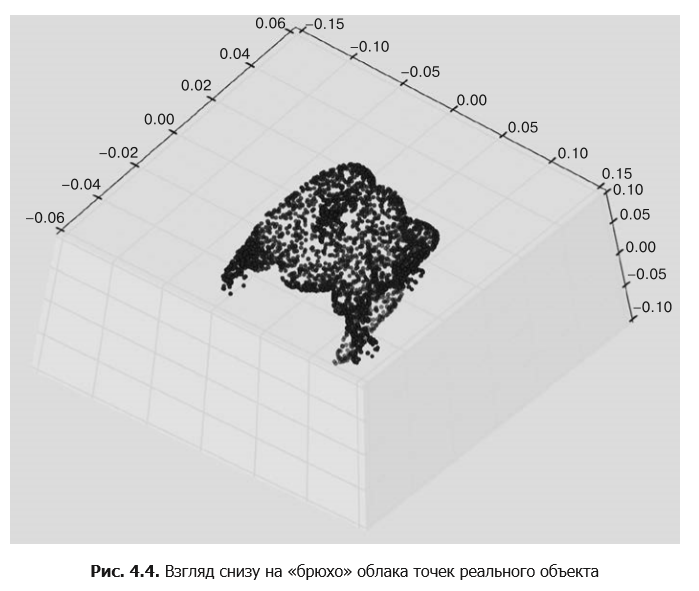

Угадаете, из какого 3D-объекта получились эти трехмерные векторы, исходя из одной только двумерной проекции, напечатанной в данной книге? Как бы вы запрограммировали компьютер для вращения объекта вокруг своей оси, чтобы удобнее его рассмотреть? Какими сводными показателями по точкам данных можно воспользоваться для оптимального выравнивания осей X и Y относительно объекта? Мысленно вращая это трехмерное пятно, представьте, как бы менялась при таком вращении дисперсия по осям X, Y и Z.

## PCA на трехмерных векторах 

Мы вручную поменяли ориентацию облака точек так, чтобы минимизировать дисперсию по осям окна графика. В результате было сложно понять, что это такое. Если SVD (LSA) сделает подобное с векторами «документ — слово», то скроет в них определенную информацию. Расположение точек одна поверх другой в двумерной проекции усложняет для человеческих глаз или алгоритма машинного обучения их разделение на осмысленные кластеры, а SVD сохраняет структуру (информационное содержание) векторов за счет максимизации дисперсии по измерениям нашей низкоразмерной «тени» пространства высокой размерности. Это как раз то, что нужно для машинного обучения, поскольку векторы низкой размерности улавливают саму «суть» того, что представляют. SVD максимизирует дисперсию по каждой из осей координат, а дисперсия оказывается отличным индикатором информации, то есть той самой искомой сути:


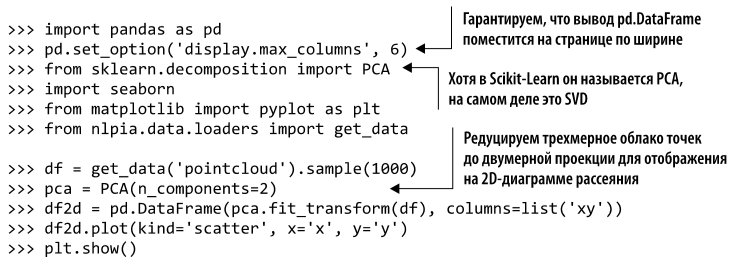

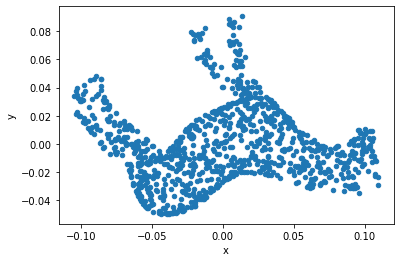

In [155]:
import pandas as pd
pd.set_option('display.max_columns',6)
from sklearn.decomposition import PCA
import seaborn

from matplotlib import pyplot as plt
from nlpia.data.loaders import get_data
df=get_data('pointcloud').sample(1000)
pca=PCA(n_components=2)
df2d=pd.DataFrame(pca.fit_transform(df), columns=list('xy'))
df2d.plot(kind='scatter', x='x', y='y')
plt.show()

При запуске этого сценария ориентация двумерной проекции может случайно перевернуться слева направо, но она никогда не повернется вверх ногами или на произвольный угол. Ориентация 2D-проекции вычисляется таким образом, что максимальная дисперсия всегда выравнивается по оси X — первой оси координат. Вторая по размеру дисперсия всегда выравнивается по оси Y — второму измерению нашей «тени» (проекции). Но полярность (знак) этих осей координат произвольна, поскольку у оптимизации остается еще две степени свободы. При оптимизации полярность векторов (точек) может свободно меняться по оси X, Y или даже по обеим этим осям координат. 

В каталоге nlpia/data вы найдете сценарий horse_plot.py, если хотите поэкспериментировать с трехмерной ориентацией лошади. Конечно, возможно и более оптимальное преобразование данных, убирающее одно измерение без снижения информационного содержания данных (с точки зрения пользователя), а Пикассо с его кубистскими «глазами» мог бы придумать и нелинейное преобразование, сохраняющее информационное содержание представлений с нескольких точек зрения сразу. И для этого существует алгоритм вложения, например представленный в главе 6.

Но разве старые добрые линейные SVD и PCA плохо сохраняют информацию из векторных данных облака точек? Так ли уж плохо 2D-проекция трехмерной лошади отражает данные? И разве не сможет машина усвоить что-то из сводных показателей этих двумерных векторов, вычисленных на основе 3D-векторов поверхности лошади (рис. 4.5)?

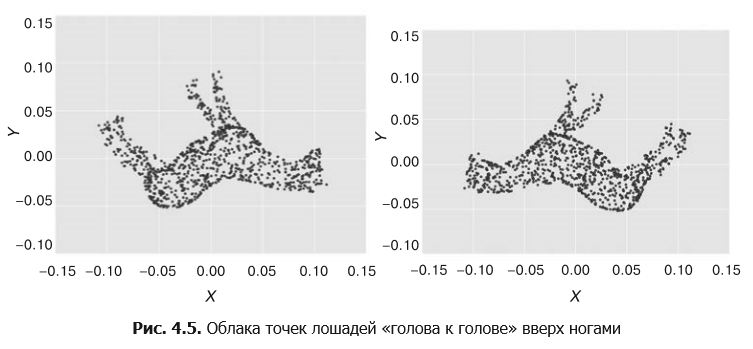

## Хватит возиться с лошадьми,  возвращаемся к NL



Взглянем, на что способен SVD при работе с документами на естественном языке. Найдем с помощью SVD главные компоненты для 5000 СМС, маркированных как спам (или не спам). Словарь и разнообразие обсуждаемых в этом ограниченном наборе СМС тем должны были относительно малы. Так что уменьшим число тем до 16. Воспользуемся как моделью PCA Scikit-Learn, так и усеченной моделью SVD, чтобы увидеть различия.

Усеченная модель SVD предназначена для работы с разреженными матрицами. Разреженные матрицы (sparse matrices) — такие, которые содержат во множестве ячеек одно и тот же значение (обычно ноль или NaN). Матрицы мультимножеств NLP и TF-IDF — почти всегда разреженные, поскольку значительная часть документов не содержит нужной части слов из словаря. Количество большинства слов равно нулю (до добавления к ним всем фиктивного количества для выравнивания данных). 

Разреженные матрицы напоминают электронные таблицы, почти пустые, но содержащие несколько разбросанных осмысленных значений. Благодаря применению плотных матриц, в которых все нули представлены явно, решение на основе модели PCA sklearn может оказаться более быстродействующим, чем TruncatedSVD. Но sklearn.PCA расходует большой объем оперативной памяти, пытаясь запомнить все эти повторяющиеся нули. Векторизатор TfidfVectorizer из Scikit-Learn возвращает разреженные матрицы, так что вы должны преобразовать их в плотные, прежде чем сравнивать результаты с PCA.

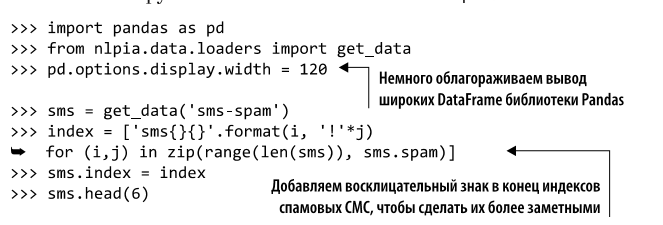

Сначала загрузим СМС из DataFrame пакета nlpia:

In [157]:
import pandas as pd
from nlpia.data.loaders import get_data
pd.options.display.width = 120
sms = get_data('sms-spam')
sms


,spam,text
0,0,"Go until jurong point, crazy.. Available only in bu..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkt...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around h..."
...,...,...
4832,1,This is the 2nd time we have tried 2 contact u. U h...
4833,0,Will ü b going to esplanade fr home?
4834,0,"Pity, * was in mood for that. So...any other sugges..."
4835,0,The guy did some bitching but I acted like i'd be i...


In [158]:
index=['sms{}{}'.format(i,'!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]
sms.index=index
sms.head(6)

,spam,text
sms0,0,"Go until jurong point, crazy.. Available only in bu..."
sms1,0,Ok lar... Joking wif u oni...
sms2!,1,Free entry in 2 a wkly comp to win FA Cup final tkt...
sms3,0,U dun say so early hor... U c already then say...
sms4,0,"Nah I don't think he goes to usf, he lives around h..."
sms5!,1,FreeMsg Hey there darling it's been 3 week's now an...


Теперь можно вычислить векторы TF-IDF для всех этих сообщений:

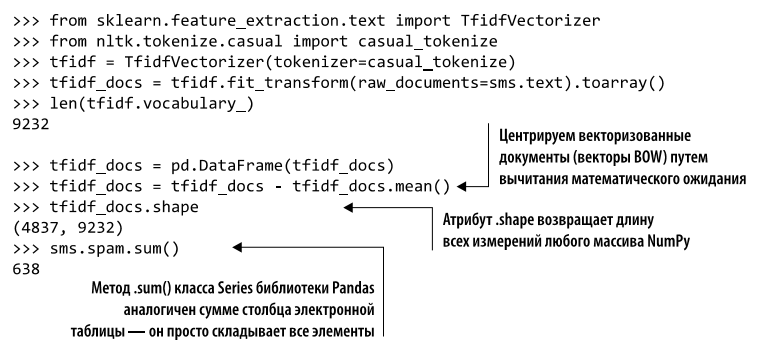

In [160]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
 
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()
len(tfidf.vocabulary_)

9232

In [161]:
tfidf_docs = pd.DataFrame(tfidf_docs)
tfidf_docs = tfidf_docs - tfidf_docs.mean()
tfidf_docs.shape

(4837, 9232)

In [162]:
sms.spam.sum()

638

Итак, у нас есть 4837 СМС, содержащих 9232 различных токена однограмм, полученных из токенизатора (casual_tokenize). Только 638 из этих 4837 сообщений (13 %) маркированы как спам. Мы имеем несбалансированный тренировочный набор данных с соотношением 8:1 не спама (нормальных СМС) к спаму (непрошеных предложений товаров/услуг и рекламы).

Решить проблему этого перекоса в сторону не спама можно, снизив «поощрение» любой модели, правильно классифицирующей не спам. Более сложная проблема — большой размер словаря, |V|. Количество токенов в словаре (9232) больше, чем количество обрабатываемых сообщений (выборок) (4832). Поэтому уникальных слов в словаре (или лексиконе) намного больше, чем СМС. И только небольшая часть этих СМС (1/8) маркирована как спам. Это верная дорога к переобучению (https://ru.wikipedia.org/wiki/Переобучение). Немногие из уникальных слов нашего большого словаря будут помечены как спамовые слова в наборе данных. 


Переобучение означает, что будет учитываться при анализе лишь несколько слов из словаря. Так что наш фильтр спама будет зависеть от того, присутствуют ли в отфильтровываемых сообщениях эти несколько спамовых слов. Спамеры легко смогут обойти нашу защиту с помощью синонимов этих спамовых слов. Если наш словарь не включает используемые спамерами новые синонимы, то фильтр будет ошибочно классифицировать эти ловко написанные СМС как не спам. 


Эта проблема с переобучением — неизменный спутник NLP. Непросто найти маркированный набор данных на естественном языке, включающий для каждой помеченной мысли все варианты ее выражения. Мы не нашли большую базу данных СМС, которая бы включала все различные варианты спама и не спама. И только у нескольких крупных корпораций достаточно ресурсов для создания подобного набора данных. Так что всем остальным приходится искать контрмеры для переобучения. Приходится использовать алгоритмы, которые хорошо производят обобщение на основе всего нескольких примеров. 

Основная контрмера для переобучения — понижение размерности. За счет уплотнения измерений (слов) в меньшее число измерений (тем) конвейер NLP становится более «общим». Если редуцировать измерения (словарь), фильтр спама станет работать на более широком диапазоне СМС. 

Именно это и делает LSA — сокращает число измерений, а значит, помогает предотвратить переобучение1. Он производит обобщение на основе маленького набора данных за счет предположения о линейной зависимости между частотностями слов. Если half встречается в спамовых сообщениях, часто включающих также слово off (например, в выражении Half off!), то LSA выявит подобные связи между словами, определит, насколько они сильны, и обобщит фразы half off в спамовых сообщениях на фразы вроде 80 % off. Возможно, даже пойдет в обобщении еще дальше: до фразы 80 % discount, если цепочка связей в данных NLP включает ассоциацию discount с off.

**ПРИМЕЧАНИЕ** 

>Некоторые исследователи рассматривают обобщение как главную проблему машинного обучения и искусственного интеллекта. Для описания исследований моделей, в которых оно доводится до крайности, требуя на порядки меньше данных для достижения той же точности, что у традиционных моделей, часто используют термин «обучение по одному примеру» (one-shot learning).


Обобщение конвейера NLP гарантирует возможности его применения к более широкому диапазону реальных СМС вместо конкретного набора сообщений.


#Применение PCA для семантического анализа СМС 

Попробуем сначала модель PCA из Scikit-Learn. Мы уже видели, как она работает, загоняя 3D-лошадей в двумерный загон. Теперь загоним набор данных 9232-мерных векторов TF-IDF в 16-мерные векторы тем: 

In [164]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 16)
pca = pca.fit(tfidf_docs)
pca_topic_vectors = pca.transform(tfidf_docs)
columns = ['topic{}'.format(i) for i in range(pca.n_components)]
pca_topic_vectors = pd.DataFrame(pca_topic_vectors, columns = columns)
pca_topic_vectors.round(3).head(6)

,topic0,topic1,topic2,...,topic13,topic14,topic15
0,0.201,0.003,0.037,...,-0.033,-0.015,0.028
1,0.404,-0.094,-0.078,...,-0.008,0.075,-0.034
2,-0.030,-0.048,0.090,...,-0.044,-0.012,0.043
3,0.329,-0.033,-0.035,...,-0.044,0.043,-0.067
4,0.002,0.031,0.038,...,-0.001,-0.073,-0.038
5,-0.016,0.059,0.014,...,0.080,-0.050,0.020


Можно узнать, какую долю каждого из слов содержат эти темы, изучив их веса. Из них понятно, насколько часто half встречается совместно с off (например, во фразе half off). После чего можно выяснить, какая из этих тем представляет собой нашу тему discount.

**СОВЕТ **
>Узнать веса любого подобранного преобразования sklearn можно, заглянув в его атрибут .components_.

Сначала распределим слова по всем измерениям преобразования PCA. Они должны быть правильно упорядочены, поскольку векторизатор TFIDFVectorizer сохраняет словарь в виде ассоциативного массива соответствий термов номерам индексов (номерам столбцов):

In [62]:
tfidf.vocabulary_

{'go': 3807,
 'until': 8487,
 'jurong': 4675,
 'point': 6296,
 ',': 13,
 'crazy': 2549,
 '..': 21,
 'available': 1531,
 'only': 5910,
 'in': 4396,
 'bugis': 1973,
 'n': 5594,
 'great': 3894,
 'world': 8977,
 'la': 4811,
 'e': 3056,
 'buffet': 1971,
 '...': 25,
 'cine': 2277,
 'there': 8071,
 'got': 3855,
 'amore': 1296,
 'wat': 8736,
 'ok': 5874,
 'lar': 4848,
 'joking': 4642,
 'wif': 8875,
 'u': 8395,
 'oni': 5906,
 'free': 3604,
 'entry': 3195,
 '2': 471,
 'a': 1054,
 'wkly': 8933,
 'comp': 2386,
 'to': 8192,
 'win': 8890,
 'fa': 3328,
 'cup': 2608,
 'final': 3450,
 'tkts': 8180,
 '21st': 497,
 'may': 5272,
 '2005': 487,
 '.': 15,
 'text': 8020,
 '87121': 948,
 'receive': 6688,
 'question': 6574,
 '(': 9,
 'std': 7651,
 'txt': 8379,
 'rate': 6628,
 ')': 10,
 't': 7889,
 '&': 7,
 "c's": 2020,
 'apply': 1383,
 '08452810075': 115,
 'over': 6003,
 '18': 438,
 "'": 8,
 's': 6959,
 'dun': 3041,
 'say': 7034,
 'so': 7438,
 'early': 3069,
 'hor': 4207,
 'c': 2019,
 'already': 1268,
 'then': 

In [73]:
column_nums, terms = zip(*sorted(zip(tfidf.vocabulary_.values(), tfidf.vocabulary_.keys())))

In [75]:
terms[:15]

('!',
 '"',
 '#',
 '#150',
 '#5000',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-')

In [77]:
column_nums[:5]

(0, 1, 2, 3, 4)

Теперь можно создать красивый DataFrame библиотеки Pandas, который будет содержать веса с метками для всех столбцов и строк: 

In [76]:
weights = pd.DataFrame(pca.components_, columns = terms, 
                       index = ['topic{}'.format(i) for i in range(16)])
weights

,!,"""",#,#150,#5000,$,%,&,',(,),*,+,",",...,èn,é,ú1,ü,ü'll,–,—,‘,’,“,…,┾,〨ud,鈥
topic0,-0.071103,0.008177,-0.001211,-0.000187,-0.000580,0.003079,-0.000177,-0.012483,-0.006919,-0.005366,-0.005121,0.005938,-0.013174,-0.058389,...,-0.000055,0.001537,-0.000109,0.109347,0.003178,-0.000243,-7.231152e-06,-0.003901,-0.000764,-6.332426e-04,-0.001703,0.000572,0.000572,0.000572
topic1,0.063531,0.007646,0.000267,-0.000390,-0.000666,-0.001286,-0.002241,-0.015989,-0.016300,0.000757,0.001742,0.040154,-0.006556,0.121387,...,-0.000237,-0.000304,-0.000261,0.006306,0.001657,0.000986,-1.151432e-07,0.004028,-0.001037,-9.860884e-04,0.003459,0.001022,0.001022,0.001022
topic2,0.070806,0.026881,0.000133,0.000565,0.001982,0.000401,0.001080,0.058787,0.008147,0.019486,0.028760,-0.013868,0.024407,0.265286,...,0.000362,0.000707,0.000365,-0.023492,0.000177,0.001481,-1.073979e-05,0.002456,0.000479,8.715765e-04,0.001957,-0.000954,-0.000954,-0.000954
topic3,-0.058872,-0.032346,-0.000513,-0.000311,-0.000678,0.001296,-0.002756,-0.027888,0.001126,-0.009577,-0.016562,0.026791,-0.017197,0.385912,...,0.000168,-0.000530,-0.000256,-0.006453,-0.000942,-0.000970,9.681974e-06,0.000190,-0.000167,-3.970411e-04,0.001429,0.000502,0.000502,0.000502
topic4,0.380880,-0.008414,0.001100,0.000788,0.003599,0.002993,-0.001214,0.067669,0.001956,0.019735,0.016832,0.068614,0.056594,-0.049700,...,-0.000061,0.000667,0.000385,-0.025966,0.000076,-0.000319,5.339212e-06,0.000428,0.000642,1.468498e-03,0.001723,0.001052,0.001052,0.001052
topic5,-0.265143,-0.052906,0.001920,0.000168,-0.000874,-0.008703,0.000038,-0.027710,-0.013816,-0.013110,-0.015638,-0.078309,-0.006445,-0.093470,...,0.000133,-0.000646,-0.000201,0.046492,0.001276,-0.000812,-1.551505e-06,-0.011401,0.000012,-3.293679e-04,-0.003441,-0.000546,-0.000546,-0.000546
topic6,-0.108813,0.019998,-0.000789,-0.000111,0.000749,-0.000253,-0.000594,-0.003482,-0.012077,-0.003292,0.001645,-0.009190,-0.006943,-0.118340,...,-0.000024,0.000336,0.000013,-0.019042,-0.000411,0.000386,-1.509882e-05,-0.003553,-0.000298,2.017530e-04,-0.001505,0.000315,0.000315,0.000315
topic7,0.161859,0.031552,0.000351,-0.000218,-0.000968,-0.002730,-0.000938,0.010549,0.013372,0.007214,0.010618,0.017267,-0.001633,0.277793,...,-0.000096,-0.001542,0.000107,-0.090083,-0.003381,0.002424,9.692967e-06,0.021399,-0.000176,-2.556863e-04,0.006205,-0.000306,-0.000306,-0.000306
topic8,0.344936,0.029093,-0.001939,0.000338,0.002096,-0.006110,-0.001807,0.033164,0.007367,-0.013284,-0.009253,0.075221,-0.000878,-0.056466,...,-0.000293,-0.001282,-0.000395,-0.037994,-0.003208,-0.005532,1.218426e-05,-0.008520,-0.000230,-5.055783e-04,-0.004248,0.000262,0.000262,0.000262
topic9,0.072319,-0.110010,-0.000401,0.000317,0.002586,-0.004538,0.000057,0.002291,-0.030523,0.002179,-0.001597,-0.044077,0.026593,-0.316008,...,-0.000166,-0.000123,0.000217,0.087035,0.002701,0.001303,-1.663447e-05,0.001885,-0.000172,-9.707718e-07,-0.003722,-0.000326,-0.000326,-0.000326


Часть из этих столбцов (термов) не слишком интересна. Лучше исследуем наш tfidf.vocabulary. Взглянем, сможем ли мы найти какие-либо из этих half off термов и узнать, к каким темам они относятся: 

In [165]:
#pd.options.display.max_columns = 8
#weights.head(4).round(3)

In [166]:
pd.options.display.max_columns = 12
deals = weights['! ;) :) half off free crazy deal only $ 80 %'.split()]. round(3) * 100 
deals

,!,;),:),half,off,free,crazy,deal,only,$,80,%
topic0,-7.1,0.1,-0.5,-0.0,-0.4,-2.0,-0.0,-0.1,-2.2,0.3,-0.0,-0.0
topic1,6.4,0.0,7.4,0.1,0.4,-2.3,-0.2,-0.1,-3.8,-0.1,-0.0,-0.2
topic2,7.1,0.2,-0.1,0.0,0.3,4.4,0.1,-0.1,0.7,0.0,0.0,0.1
topic3,-5.9,-0.3,-7.1,0.2,0.3,-0.2,0.0,0.1,-2.3,0.1,-0.1,-0.3
topic4,38.1,-0.1,-12.5,-0.1,-0.2,9.9,0.1,-0.2,3.0,0.3,0.1,-0.1
topic5,-26.5,0.1,-1.5,-0.3,-0.7,-1.4,-0.6,-0.2,-1.8,-0.9,0.0,0.0
topic6,-10.9,-0.5,19.8,-0.4,-0.9,-0.6,-0.2,-0.1,-1.4,-0.0,-0.0,-0.1
topic7,16.2,0.1,-18.0,0.8,0.8,-2.8,0.0,0.0,-1.8,-0.3,0.0,-0.1
topic8,34.5,0.1,5.3,-0.4,-0.5,0.1,-0.4,-0.4,3.3,-0.6,-0.0,-0.2
topic9,7.2,-0.3,16.1,1.5,-0.9,6.5,-0.5,-0.4,3.1,-0.5,-0.0,0.0


In [80]:
deals.T.sum()

topic0    -11.9
topic1      7.6
topic2     12.7
topic3    -15.5
topic4     38.3
topic5    -33.8
topic6      4.7
topic7     -5.1
topic8     40.8
topic9     31.8
topic10   -30.0
topic11   -45.2
topic12    16.8
topic13    47.5
topic14    26.0
topic15    -5.8
dtype: float64

Похоже, что тональности «торговли» (deals) для всех тем 4, 8 и 9 положительны, а темы 0, 3 и 5 представляют собой «антиторговлю» и содержат сообщения о противоположных вещах. Так что связанные с «торговлей» слова могут положительно влиять на одни темы и отрицательно — на другие. Не существует одного явного номера темы «торговли».

In [167]:
#deals = weights['dog'.split()].round(3)
#deals

**ВАЖНО**
>Токенизатор casual_tokenize разбивает 80 % на ["80", "%"], а \$ 80 million — на [\$, "80", "million"]. Если не воспользоваться LSA или токенизатором биграмм, то никакой разницы между 80 % и $80 million для конвейера NLP не будет. Оба этих выражения включают токен "80".

Поиск смысла тем — одна из самых сложных задач LSA. В LSA между словами возможны только линейные связи. Обычно у вас есть лишь очень небольшой корпус. Так что слова в темах будут зачастую сочетаться бессмысленным для человека способом. В одно измерение (главную компоненту) будут «запихиваться» по нескольку слов из различных тем для гарантии, что модель захватит как можно больше дисперсии, используемой нашими 9232 словами. 

##Применение усеченного SVD для семантического анализа СМС

Теперь можно попробовать воспользоваться моделью TruncatedSVD из Scikit-Learn. При этом более непосредственном варианте LSA, который работает в обход модели PCA Scikit-Learn, видно, что происходит внутри адаптера PCA. Она умеет работать с разреженными матрицами, так что при работе с большими наборами данных все равно лучше воспользоваться TruncatedSVD, а не PCA. SVD-часть TruncatedSVD разбивает TF-IDF-матрицу на три другие матрицы, а Truncated-часть отбрасывает измерения, содержащие меньше всего информации о матрице TF-IDF. Эти отброшенные измерения представляют темы (линейные сочетания слов), в наименьшей степени варьирующиеся в пределах нашего набора документов. Вероятно, они содержат массу стоп-слов и других слов, равномерно распределенных по всем документам. 

Мы воспользуемся TruncatedSVD, чтобы оставить только 16 наиболее интересных тем, на долю которых приходится львиная доля дисперсии в наших векторах TF-IDF:

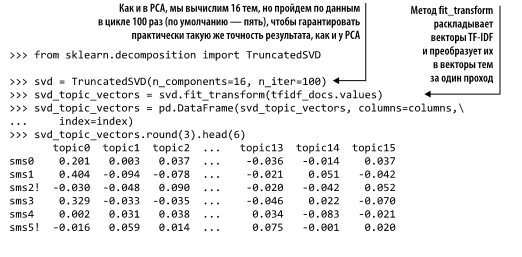

In [85]:
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]

In [86]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=16, n_iter=100)
svd_topic_vectors = svd.fit_transform(tfidf_docs.values)
svd_topic_vectors = pd.DataFrame(svd_topic_vectors, columns = columns, index=index)
svd_topic_vectors.round(3).head(6)

,topic0,topic1,topic2,topic3,topic4,topic5,...,topic10,topic11,topic12,topic13,topic14,topic15
sms0,0.201,0.003,0.037,0.011,-0.019,-0.053,...,0.007,-0.007,0.002,-0.036,-0.014,0.037
sms1,0.404,-0.094,-0.078,0.051,0.100,0.047,...,-0.004,0.036,0.043,-0.021,0.051,-0.042
sms2!,-0.030,-0.048,0.090,-0.067,0.091,-0.043,...,0.125,0.023,0.026,-0.020,-0.042,0.052
sms3,0.329,-0.033,-0.035,-0.016,0.052,0.056,...,0.022,0.023,0.073,-0.046,0.022,-0.070
sms4,0.002,0.031,0.038,0.034,-0.075,-0.093,...,0.028,-0.009,0.027,0.034,-0.083,-0.021
sms5!,-0.016,0.059,0.014,-0.006,0.122,-0.040,...,0.041,0.055,-0.037,0.075,-0.001,0.020


Эти векторы тем, полученные из TruncatedSVD, аналогичны сгенерированным PCA! Такого результата удалось добиться благодаря большому числу итераций (n_iter) и тому, что мы позаботились о центрировании всех частотностей TF-IDF для каждого из термов (столбцов) относительно нуля (путем вычитания среднего значения для каждого терма). 

Посмотрите внимательнее на веса для каждой из тем и попробуйте понять их значения. Можно ли классифицировать эти шесть СМС как спам или не спам, не зная, о чем эти темы и у каких слов в них наибольшие веса? В этом поможет метка ! возле меток строк спамовых СМС. Это непростая, но выполнимая задача, особенно для машины, которая может просмотреть все 5000 наших тренировочных примеров и выбрать для каждой из тем пороговые значения, позволяющие отличить спам от не спама. 

## Насколько хорошо LSA классифицирует спам

Один из способов определить, насколько хорошо модель векторного пространства производит классификацию, — выяснить, как косинусный коэффициент подобия двух векторов коррелирует с их принадлежностью одному и тому же классу. Посмотрим, пригодится ли косинусный коэффициент подобия между соответствующими парами документов для нашей конкретной задачи бинарной классификации. Вычислим скалярные произведения между первыми шестью векторами тем для первых шести СМС. Легко заметить большие положительные косинусные коэффициенты сходства (скалярные произведения) между спамовыми сообщениями (sms2!):

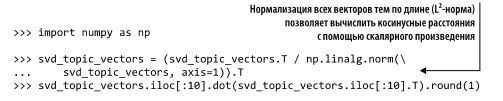

In [88]:
import numpy as np
svd_topic_vectors=(svd_topic_vectors.T/np.linalg.norm(svd_topic_vectors)).T
svd_topic_vectors.iloc[:10].dot(svd_topic_vectors.iloc[:10].T).round(1)

,sms0,sms1,sms2!,sms3,sms4,sms5!,sms6,sms7,sms8!,sms9!
sms0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
sms1,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
sms2!,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
sms3,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
sms4,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
sms5!,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
sms6,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
sms7,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
sms8!,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
sms9!,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0


Изучение столбца sms0 (или строки sms0) показывает, что косинусные коэффициенты сходства между sms0 и спамовыми сообщениями (sms2!, sms5!, sms8!, sms9!) — существенно меньше нуля. Вектор темы для sms0 заметно отличается от векторов тем спамовых сообщений.

Проделывая то же самое для столбца sms2!, видим положительную корреляцию с другими спамовыми сообщениями. Семантика спамовых сообщений схожа, они посвящены одинаковым темам.

Подобным образом работает и семантический поиск. Косинусный коэффициент между вектором запроса и всеми векторами тем в базе данных документов можно использовать для поиска наиболее семантически похожего сообщения в базе. Ближайший в смысле расстояния к вектору конкретного запроса документ соответствует наиболее близкому по смыслу документу. Спамовость — лишь один из смыслов, вкладываемых в темы наших СМС.

К сожалению, подобное сходство между векторами тем в каждом из классов (спам и не спам) не сохраняется для всех сообщений. Для этого набора векторов тем непросто провести границу между спамовыми и неспамовыми сообщениями. Сложно установить пороговое значение сходства отдельного спамового сообщения, которое бы гарантировало правильную классификацию на спам и не спам. Чем менее спамовым является сообщение, тем дальше оно находится (менее похоже) от других спамовых сообщений в наборе данных. Этого знания достаточно для создания фильтра спама на основе имеющихся векторов тем, а алгоритм машинного обучения может просмотреть все темы по отдельности на предмет меток «спам/не спам» и провести гиперплоскость или другую границу между спамовыми и неспамовыми сообщениями. 

При использовании усеченного SVD необходимо отбросить собственные значения, прежде чем вычислять векторы тем. Мы хитростью заставили реализацию TruncatedSVD из Scikit-Learn проигнорировать информацию о масштабе из собственных значений (S-матрицы на наших диаграммах) за счет: 

*  нормализации векторов TF-IDF по длине (L2-норма); 
* центрирования частотностей термов TF-IDF путем вычитания средней частотности каждого из термов (слов). 

Процесс нормализации исключает любое масштабирование (систематическую ошибку) собственных значений и концентрирует SVD на относящейся к повороту части преобразования векторов TF-IDF. Благодаря игнорированию собственных значений (масштаба/длины вектора) можно построить гиперкуб, ограничивающий векторное пространство тем, благодаря чему можно считать в своей модели все темы равноценными. Для использования этого приема в своей реализации SVD вы можете нормализовать все векторы TF-IDF по L2-норме перед вычислением SVD или усеченного SVD. Реализация PCA из Scikit-Learn выполняет это вместо вас, «центрируя» и «отбеливая» данные. 

Без такой нормализации вес редких тем оказывается немного больше, чем был бы в противоположном случае. Спамовость — редкая тема, встречающаяся лишь в 13 % случаев. Вследствие такой нормализации или отбрасывания собственных значений вес соответствующих тем окажется больше. При таком подходе полученные в результате темы окажутся более коррелированными с малозаметными характеристиками, такими как спамовость.

**СОВЕТ** 

>Какой бы алгоритм или реализацию вы ни использовали для семантического анализа (LSA, PCA, SVD, усеченный SVD или LDiA), сначала нормализуйте свои векторы BOW или TF-IDF. В противном случае можно столкнуться с большими различиями в масштабе тем. Они снижают возможности модели различать малозаметные, редко встречающиеся темы. Можно наглядно представить, что изменения масштаба приводят к «каньонам» и «рекам» в контурном графике целевой функции, что затрудняет для других алгоритмов машинного обучения поиск на этой «пересеченной местности» оптимальных пороговых значений для тем.


## Латентное размещение Дирихле 


Почти всю главу мы обсуждали латентно-семантический анализ и различные способы его выполнения с помощью Scikit-Learn или NumPy. Для большинства задач моделирования тем, семантического анализа и механизмов рекомендации на основе содержимого следует пробовать LSA. Лежащая в его основе математика проста и эффективна, и получаемое в результате линейное преобразование может применяться к новым пакетам данных на естественном языке без обучения при небольшой потере точности. В некоторых случаях LDiA обеспечивает немного лучшие результаты. 

LDiA производит многое из того, что мы делали для создания тематических моделей с помощью LSA (и SVD). В отличие от LSA, LDiA предполагает, что частотности слов распределены по Дирихле. Такое допущение точнее отражает статистику распределения слов по темам, чем линейная математика LSA. 

LDiA создает семантическую модель векторного пространства (подобную векторам тем) с помощью подхода, аналогичного ходу ваших мыслей во время описанного в данной главе мысленного эксперимента. Тогда вы сами распределяли слова по темам в соответствии с частотой их совместной встречаемости в одном документе. Далее можно определить смесь тем для документа на основе сочетаний слов в каждой из тем, в которую эти слова были распределены. Поэтому понятность тематического моделирования методом LDiA намного выше, чем при LSA, благодаря распределению слов по темам, а тем — по документам.

LDiA рассматривает каждый из документов как смесь (линейную комбинацию) некоего произвольного числа тем, выбираемого при начале обучения модели LDiA. И предполагает, что любую тему можно представить с помощью распределения слов (частотностей термов). Вычисление вероятности (веса) каждой из этих тем в документе, как и вероятности попадания слова в конкретную тему, начинается с распределения вероятности Дирихле (априорного распределения, если вы еще помните курс статистики). Поэтому данный алгоритм и получил такое название.


## Основная идея 

LDiA Подход LDiA был разработан в 2000 году британскими генетиками для упрощения «вывода структуры популяции» по последовательности генов1. Стэнфордские исследователи (в том числе Эндрю Ын (Andrew Ng)) распространили этот подход на NLP в 2003 году2. Не пугайтесь громких имен создателей этого подхода. Мы объясним его главные нюансы всего в нескольких строках кода на языке Python. Вам нужно понимать ровно столько, чтобы интуитивно чувствовать, что этот метод делает. Тогда вы будете знать, для чего он может пригодиться в вашем конвейере. 

Блай и Ын предложили эту идею, перевернув наш мысленный эксперимент с ног на голову. Они придумали, как машина, умеющая только бросать игральные кости (генерировать случайные числа), может писать документы для анализируемого корпуса. Поскольку мы имеем дело только с мультимножествами, они отказались от упорядочения этих слов, которое делало фразу осмысленной и позволяло сформировать настоящий документ. Они просто смоделировали статистические показатели для смеси слов, которая бы была частью конкретного BOW для каждого из документов. 

Блай и Ын представили себе машину, которой, чтобы начать генерацию смеси слов для конкретного документа, нужно принять всего одно из двух решений. Они предположили, что генератор документов выбирает эти слова случайным образом. Причем возможные варианты распределены по определенному вероятностному закону, вроде выбора числа граней игральной кости и сочетания костей, необходимого для создания листа персонажа в игре «Подземелья и драконы». Для «листа персонажа» нашего документа необходимо всего два броска костей. Но эти кости велики и их несколько, а правила их комбинирования для получения нужных вероятностей для различных желаемых значений — сложны. Нам требуются определенные распределения вероятностей для чисел слов и тем, соответствующие распределениям данных значений в реальных документах. 

Эти два броска костей символизируют: 

1) число генерируемых для документа слов (распределение Пуассона); 

2) число смешиваемых для документа тем (распределение Дирихле).

После получения этих двух чисел начинается самое сложное — выбор слов для документа. Воображаемая машина генерации BOW проходит в цикле по темам и выбирает случайным образом подходящие для текущей темы слова, пока не достигнет числа слов, которое (как было решено на шаге 1) должен содержать документ. Самое сложное — выбрать вероятности этих слов для тем: то, насколько слова подходят для каждой из них. После этого наш «робот» просто ищет вероятности нужных слов для каждой из тем в матрице вероятностей «тема — слово». Если не помните, как эта матрица выглядит, взгляните на приведенный ранее в данной главе простой пример.


Все, что нужно этой машине, — один параметр для пуассоновского распределения (при броске костей на шаге 1), указывающий желаемую среднюю длину документа, и еще пара параметров для задания распределения Дирихле, которое определяет число тем. Далее нашему алгоритму генерации документов понадобится матрица «терм — тема» всех желаемых слов и тем, то есть его словарь. И еще — смесь тем, о которых он хочет «говорить». 

Вернемся от генерации (написания) документов к исходной задаче оценки тем и слов существующего документа. В ней нужно измерить (вычислить) упомянутые параметры слов и тем для первых двух шагов. После этого необходимо вычислить матрицу «терм — тема» по набору документов. Именно это и делает LDiA. 

Блай и Ын поняли, что параметры для шагов 1 и 2 можно определить, проанализировав статистические показатели документов из корпуса. Например, для шага 1 можно вычислить среднее число слов (или n-грамм) во всех мультимножествах слов документов из корпуса. Примерно вот так: 

In [89]:
total_corpus_len = 0
for document_text in sms.text:
  total_corpus_len += len(casual_tokenize(document_text))
mean_document_len = total_corpus_len / len(sms)
round(mean_document_len, 2) 

21.35

Или в одну строку кода: 

In [90]:
round(sum([len(casual_tokenize(t)) for t in sms.text]) * 1. / len(sms.text), 2)

21.35

Учтите, что вычислять этот статистический показатель следует непосредственно на основе ваших BOW. Причем обязательно подсчитывать в документах токенизированные и векторизованные слова (Counter()). И произвести фильтрацию стоп-слов либо какую-то другую нормализацию перед подсчетом уникальных термов. Таким образом, в этот подсчет будут включены все слова из словаря векторов BOW (все подсчитываемые n-граммы), но только используемые BOW слова (а не стоп-слова, например). Как и другие алгоритмы из этой главы, данный алгоритм LDiA основан на мультимножественной модели векторного пространства. 

Второй параметр, который необходимо указать для модели LDiA, представляет собой несколько бóльшую проблему. Число тем в конкретном наборе документов нельзя измерить непосредственно до распределения слов по темам. Здесь, как и в методе k-средних и KNN, необходимо указать k заранее. Можно высказать предположение о числе тем (подобно числу кластеров k в методе k-средних), а затем проверить, подходит ли оно для вашего набора документов. Когда вы укажете методу LDiA, сколько тем искать, он найдет подходящую для каждой темы смесь слов, которая бы оптимизировала его целевую функцию.

Оптимизировать этот гиперпараметр (k, число тем) можно путем его подгонки вплоть до момента, когда он окажется подходящим для приложения. Эту оптимизацию можно автоматизировать, если есть возможность измерить каким-либо образом качество отражения языковой моделью LDiA смысла документов. Одна из подходящих для этой оптимизации функций стоимости — степень эффективности (или неэффективности) работы данной модели LDiA в задачах классификации или регрессии, например, при анализе тональностей, тем или разметке ключевых слов документа. Для этого необходим набор маркированных документов, на которых можно будет проверить тематическую модель (классифи катор).

## Тематическая модель LDiA для СМС

 Генерируемые LDiA темы обычно более понятны и объяснимы для людей. Дело в том, что часто встречающиеся вместе слова распределяются по одним темам, чего люди обычно и ждут. Если LSA (PCA) старается оставлять в удалении изначально удаленные элементы, то LDiA стремится собирать вместе изначально близко расположенные элементы. 
 Может показаться, что эти подходы одинаковые, но нет. Математически при этом производится оптимизация разных вещей. Целевые функции оптимизаторов при этом различны, так что и цели будут достигнуты разные. Чтобы сохранить близость векторов высокой размерности при переходе в пространство низкой размерности, LDiA приходится нелинейно изгибать и деформировать пространство (и сами векторы). Это сложно продемонстрировать наглядно, разве что выполнить оптимизацию 3D-данных и вычислить двумерные «проекции» получившихся векторов. 

 Если хотите помочь другим читателям и попутно чему-то научиться — добавляйте еще код в пример с лошадью (https://github.com/totalgood/nlpia/blob/master/src/nlpia/ book/examples/ch04_horse.py) и отправляйте его на GitHub в nlpia (https://github.com/ totalgood/nlpia). Например, можно создать векторы «слово — документ» для каждой из тысяч точек лошади, преобразовав их в целочисленные значения количеств слов x, y и z, то есть измерения трехмерного векторного пространства. После этого можно сгенерировать на основе этих значений искусственные документы и пропустить их через все примеры LDiA и LSA, приведенные ранее в этой лекции.

 Взглянем, как сделать это для набора данных из нескольких тысяч СМС, маркированных как спам и не спам. Сначала вычислим векторы TF-IDF, а затем векторы тем для всех СМС (документов). Для классификации сообщений по спаму мы будем, как и ранее, использовать только 16 тем (компонент). Небольшое число тем (измерений) снижает риск переобучения. 
 
 LDiA использует исходные векторы BOW для количеств слов, а не нормализованные векторы TF-IDF. Вот простой способ, как вычислить векторы BOW в Scikit-Learn: 

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import casual_tokenize
np.random.seed(42)
counter = CountVectorizer(tokenizer=casual_tokenize)
bow_docs = pd.DataFrame(counter.fit_transform(raw_documents=sms.text).toarray(), index=index)
column_nums, terms = zip(*sorted(zip(counter.vocabulary_.values(),counter.vocabulary_.keys())))
bow_docs.columns = terms 

Еще раз проверим осмысленность наших подсчитанных количеств слов для первого СМС с меткой sms0: 

In [103]:
sms[:1].text
#sms.loc['0'].text

0    Go until jurong point, crazy.. Available only in bu...
Name: text, dtype: object

In [104]:
bow_docs.loc['sms0'][bow_docs.loc['sms0'] > 0].head()

,            1
..           1
...          2
amore        1
available    1
Name: sms0, dtype: int64

Так можно воспользоваться LDiA для создания векторов тем для нашего корпуса SMS:

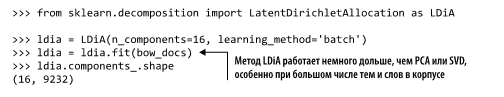

In [105]:
from sklearn.decomposition import LatentDirichletAllocation as LDiA
Idia=LDiA(n_components=16, learning_method='batch')
Idia=Idia.fit(bow_docs)
Idia.components_.shape

(16, 9232)

Итак, наша модель распределила 9232 слова по 16 темам (компонентам). Давайте взглянем на несколько первых слов и их распределение по нашим 16 темам. Учтите, что ваши результаты могут отличаться от наших. LDiA — стохастический алгоритм, использующий генератор случайных чисел для принятия части статистических решений относительно распределения термов по темам. Так что ваши веса «тема — слово» будут отличаться от приведенных ниже, хотя порядок будет тем же. При каждом запуске sklearn.LatentDirichletAllocation (или любого другого алгоритма LDiA) результаты будут различаться, если не зафиксировать начальное значение для генератора случайных чисел: 

In [106]:
pd.set_option('display.width', 75)
components = pd.DataFrame(Idia.components_.T, index=terms,columns=columns)
components.round(2).head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,...,topic10,topic11,topic12,topic13,topic14,topic15
!,184.03,15.00,72.22,394.95,45.48,36.14,...,37.42,44.18,64.40,297.29,41.16,11.70
"""",0.68,4.22,2.41,0.06,152.35,0.06,...,8.42,11.42,0.07,62.72,12.27,0.06
#,0.06,0.06,0.06,0.06,0.06,2.07,...,0.06,0.06,1.07,4.05,0.06,0.06


Восклицательный знак (!) попал в большинство тем, но есть и особенно значительный topic3, в котором символ кавычек (") практически никакой роли не играет. Возможно, topic3 посвящен эмоциям и для него неважны числа или кавычки. Посмотрим: 

In [107]:
components.topic3.sort_values(ascending=False)[:10]

!       394.952246
.       218.049724
to      119.533134
u       118.857546
call    111.948541
£       107.358914
,        96.954384
*        90.314783
your     90.215961
is       75.750037
Name: topic3, dtype: float64

Десять наиболее важных токенов этой темы относятся к словам, применяемым в эмоциональных распоряжениях, требующих от кого-либо сделать/заплатить чтолибо. Интересно выяснить, используется ли эта тема чаще в спамовых сообщениях или неспамовых. Как видите, распределение слов по темам вполне объяснимо и доступно анализу даже при таком беглом взгляде. 

Перед подгонкой классификатора LDiA, необходимо вычислить эти векторы тем для всех документов (СМС). Посмотрим, насколько они отличаются от векторов тем, сгенерированных SVD и PCA для тех же документов: 

In [110]:
Idia16_topic_vectors = Idia.transform(bow_docs)
ldia16_topic_vectors = pd.DataFrame(Idia16_topic_vectors,index=index, columns=columns)
ldia16_topic_vectors.round(2).head()

,topic0,topic1,topic2,topic3,topic4,topic5,...,topic10,topic11,topic12,topic13,topic14,topic15
sms0,0.00,0.62,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00
sms1,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.12,0.01,0.01,0.01,0.01
sms2!,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00
sms3,0.00,0.00,0.00,0.00,0.09,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00
sms4,0.39,0.00,0.33,0.00,0.00,0.00,...,0.00,0.00,0.09,0.00,0.00,0.00


Все эти темы разделены более четко. В нашем распределении тем по сообщениям множество нулей. Именно благодаря этому темы LDiA гораздо проще объяснить коллегам при принятии бизнес-решений на основе результатов работы конвейера NLP.

Итак, для людей темы LDiA отлично подходят. Как насчет машин? Насколько хорошо отработает наш классификатор LDA с ними? 

## LDiA + LDA = классификатор спама

Взглянем, насколько хорошо эти темы LDiA подходят для предсказания чего-нибудь полезного, например того, является ли сообщение спамом. Мы воспользуемся векторами тем LDiA для обучения модели LDA (аналогично тому, как мы делали с векторами тем PCA):

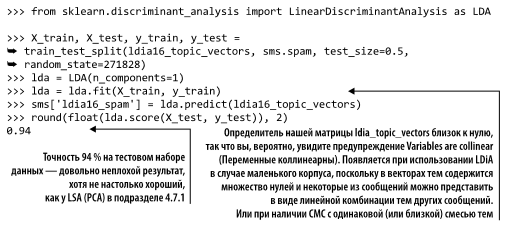

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(Idia16_topic_vectors, sms.spam, test_size=0.5, random_state=271828)
Ida=LDA(n_components=1)
Ida=Ida.fit(X_train, y_train)
sms['ldia16_spam']=Ida.predict(ldia16_topic_vectors)
round(float(Ida.score(X_test, y_test)), 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.94

Алгоритмы train_test_split() и LDiA — стохастические. Так что при каждом запуске результаты и показатели точности будут различными. Чтобы результаты конвейера стали воспроизводимыми, необходимо задавать для этих моделей и разбиения набора данных одно и то же значение аргумента seed при каждом запуске. 

Один из случаев, когда может появиться предупреждение о коллинеарности, — если текст содержит несколько би- или триграмм, которые составляют слова, встречающиеся только вместе. Так что итоговой модели LDiA придется делить веса между этими эквивалентными частотностями термов произвольным образом. Сможете найти в своих СМС подобные вызывающие коллинеарность слова (с нулевым определителем)? Вам нужно искать слово, которое всегда сопровождает в том же сообщении другое (парное ему) слово. 

Такой поиск можно произвести с помощью Python, а не вручную. Прежде всего поискать в корпусе идентичные векторы мультимножеств. Они возможны и для неидентичных СМС, например: Hi there Bob! и Bob, Hi there, поскольку значения количеств слов в них одинаковы. Вы можете пройти в цикле по всем парам из мультимножества слов в поиске идентичных векторов. Они уж точно вызовут предупреждение о коллинеарности как в LDiA, так и в LSA.


Если найти точные копии векторов BOW не удастся, можно пройти в цикле по всем парам слов в словаре: по всем мультимножествам слов в поиске пар СМС, содержащих одни и те же два терма. Если эти слова никогда не встречаются в СМС по отдельности, значит, вы нашли в своем наборе данных одну из искомых коллинеарностей. В число распространенных биграмм, вызывающих этот эффект, входят имена и фамилии известных людей, которые всегда встречаются совместно и никогда не используются по отдельности, например Bill Gates. Конечно, если в ваших СМС не встречается других людей по имени Bill.

**СОВЕТ** 
>При необходимости пройти в цикле по всем сочетаниям (парам или тройкам) множества объектов можно воспользоваться встроенной функцией product() языка Python: 

In [119]:
from itertools import product
#all_pairs = [(word1, word2) for (word1, word2) in product(word_list, word_list) if not word1 == word2]

Наша точность на тестовом наборе данных составила более 90 %, и это при обучении лишь на половине имеющихся данных. Но мы получили предупреждение о коллинеарности наших признаков из-за ограниченности набора данных, что вызывает проблему недоопределенности у LDA. Определитель нашей матрицы «тема — документ» близок к нулю, поскольку мы отбросили половину документов с помощью метода train_test_split. При необходимости можно уменьшить значение n_components, чтобы решить данную проблему, но при этом темы, являющиеся линейной комбинацией друг друга (коллинеарные), будут объединяться. 

Сравним нашу модель LDiA с моделью более высокой размерности, основанной на векторах TF-IDF. Наши векторы TF-IDF содержат намного больше признаков (более 3000 уникальных термов), поэтому вполне возможны переобучение и плохое обобщение. В этом случае пригодится обобщение LDiA и PCA:

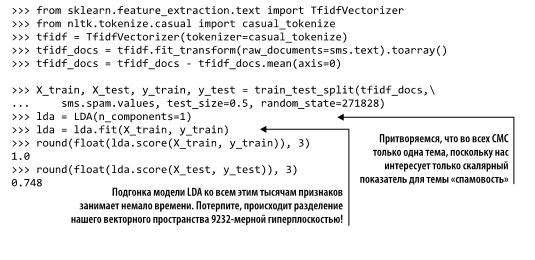

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
tfidf=TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs=tfidf.fit_transform(raw_documents=sms.text).toarray()
tfidf_docs=tfidf_docs-tfidf_docs.mean(axis=0)

X_train, X_test, y_train, y_test=train_test_split(tfidf_docs, sms.spam.values, test_size=0.5, random_state=271828)
Ida=LDA(n_components=1)
Ida=Ida.fit(X_train, y_train)
round(float(Ida.score(X_train, y_train)), 3)


1.0

In [124]:
round(float(Ida.score(X_test, y_test)), 3)

0.748

Точность на тренировочном наборе данных для основанной на векторах модели TF-IDF идеальная! Но точность на тестовом наборе данных намного хуже, чем при ее обучении на векторах более низкой размерности вместо векторов TF-IDF. 

При этом точность на тестовом наборе данных имеет большое значение. Здесь нам понадобится тематическое моделирование (LSA). Оно помогает производить обобщение моделей с маленького тренировочного набора данных, так что хорошо работает и на сообщениях с различными сочетаниями слов (но схожими темами). 

### Более честное сравнение: 32 темы LDiA

Попробуем LDiA еще раз при большем числе измерений и тем. Возможно, LDiA не так эффективен, как LSA (PCA), и ему требуется большее число тем, по которым можно распределить слова. Попробуем вариант с 32 темами (компонентами): 

In [125]:
ldia32 = LDiA(n_components=32, learning_method='batch')
ldia32 = ldia32.fit(bow_docs)
ldia32.components_.shape

(32, 9232)

Теперь вычислим новые 32-мерные векторы тем для всех документов (СМС): 

In [126]:
ldia32_topic_vectors = ldia32.transform(bow_docs)
columns32 = ['topic{}'.format(i) for i in range(ldia32.n_components)]
ldia32_topic_vectors = pd.DataFrame(ldia32_topic_vectors, index=index,columns=columns32)
ldia32_topic_vectors.round(2).head()

,topic0,topic1,topic2,topic3,topic4,topic5,...,topic26,topic27,topic28,topic29,topic30,topic31
sms0,0.0,0.00,0.0,0.06,0.14,0.00,...,0.0,0.00,0.0,0.00,0.0,0.0
sms1,0.0,0.00,0.0,0.00,0.53,0.00,...,0.0,0.00,0.0,0.14,0.0,0.0
sms2!,0.0,0.00,0.0,0.00,0.00,0.65,...,0.0,0.00,0.0,0.00,0.0,0.0
sms3,0.0,0.11,0.0,0.00,0.39,0.00,...,0.0,0.00,0.0,0.00,0.0,0.0
sms4,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.47,0.0,0.00,0.0,0.0


Как видите, эти темы еще более разрежены и четко разделены.

 А вот код обучения нашей LDA-модели (классификатора). На этот раз с 32-мерными векторами тем LDiA:

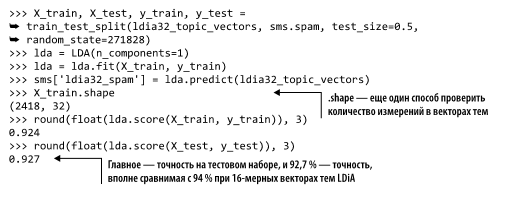

In [127]:
X_train, X_test, y_train, y_test=train_test_split(ldia32_topic_vectors, sms.spam, test_size=0.5, random_state=271828)
Ida=LDA(n_components=1)
Ida=Ida.fit(X_train, y_train)
sms['ldia16_spam']=Ida.predict(ldia32_topic_vectors)
X_train.shape

(2418, 32)

In [128]:
round(float(Ida.score(X_train, y_train)), 3)

0.933

In [129]:
round(float(Ida.score(X_test, y_test)), 3)

0.936

Не путайте эту оптимизацию числа тем (компонент) с изложенной выше проблемой коллинеарности. Увеличение/уменьшение числа тем не решает/создает проблему коллинеарности. Источник этой проблемы кроется в исходных данных. Чтобы избавиться от этого предупреждения, необходимо добавить шум (метаданные) в виде искусственно созданных слов в СМС или удалить повторяющиеся векторы слов. Никакое количество тем не решит проблемы наличия векторов слов или пар слов, часто повторяющихся в документах. 

Большее число тем повышает определенность относительно тем и, по крайней мере для данного набора, генерирует лучше линейно разделяемые темы. Но до 96 % точности PCA + LDA еще далеко. Так, PCA лучше рассредоточивает векторы тем СМС, увеличивая промежутки между сообщениями для разделения классов гиперплоскостью. 

Не стесняйтесь заглянуть в исходный код моделей размещения Дирихле, доступный как в Scikit-Learn, так и библиотеке gensim. Их API схоже с LSA (см. sklearn.TruncatedSVD и gensim.LsiModel). Мы продемонстрируем пример приложения при обсуждении автоматического реферирования в последующих главах. LDiA хорошо подходит для поиска объяснимых тем вроде используемых для автоматического реферирования. И неплохо создает пригодные для линейной классификации темы.

## Расстояние и подобие

Снова обратимся к показателям подобия, о которых мы говорили в главах 2 и 3, и убедимся, что наше новое векторное пространство тем подходит для них. Определить, насколько похожи (далеки) два документа, можно посредством показателей подобия (и расстояний) на основе сходства (расстояния между) представляющих их векторов. 

С помощью показателей подобия (и расстояний) можно понять, насколько хорошо модель LSA согласуется с моделью TF-IDF более высокой размерности из лекции 3. И как модель сохраняет эти расстояния после исключения больших объемов информации, содержащейся в мультимножествах намного более высокой размерности. Можно проверить, насколько удалены друг от друга векторы тем и какую роль играет качество представления расстояния между предметами обсуждения документов. Нам нужно убедиться, что схожие по смыслу документы близки друг к другу в нашем новом векторном пространстве тем. 

LSA сохраняет большие расстояния, но не всегда — малые (тонкую структуру взаимосвязей между документами). Лежащий в его основе алгоритм SVD ориентирован на максимизацию дисперсии между всеми документами в новом векторном пространстве тем. 

Расстояния между векторами признаков (слов, тем, контекста документов и т. д.) — движущая сила эффективности работы конвейера NLP и вообще любого конвейера машинного обучения. Так какие существуют варианты измерения расстояния в многомерном пространстве? И какие из них выбрать для конкретной задачи NLP? Некоторые из этих часто используемых вариантов знакомы вам из курса геометрии или линейной алгебры, в то время как другие, вероятно, в новинку: 

* евклидово (декартово) расстояние, оно же корень из среднеквадратической погрешности (root mean square error, RMSE): 2-норма, или $L_2$; 

* квадрат евклидова расстояния, сумма квадратов расстояния (SSD): $L^{2}_{2}$ ; 

* косинусное (угловое, проекционное) расстояние: нормализованное скалярное произведение; 

* расстояние Минковского: p-норма ($L_p$); 

* выраженное в дробях расстояние (дробная норма): p-норма ($L_p$) для 0 < p < 1; 

* метрика городских кварталов (манхэттенская метрика, метрика такси); сумма абсолютных расстояний (sum of absolute distance, SAD): l-норма ($L_1$); 

* расстояние Жаккара (обратное подобие множеств);

* расстояние Махаланобиса; 

* расстояние Левенштейна (расстояние редактирования). 

Разнообразие способов вычисления расстояния — свидетельство его важности. Помимо реализаций попарного расстояния из Scikit-Learn, применяется и множество других в таких математических дисциплинах, как топология, статистика и машиностроение1. В листинге ниже приведены расстояния, реализованные в модуле sklearn.metrics.pairwise

Доступные в sklearn попарные расстояния

 'cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule' 

Оценки расстояния часто вычисляются на основе мер (показателей) подобия и наоборот и являются обратно пропорциональными показателям подобия. Показатели подобия устроены так, что их значение находится в диапазоне от 0 до 1. Типичные формулы преобразования: 

In [131]:
#similarity = 1. / (1. + distance)
#distance = (1. / similarity) - 1. 

Но для расстояний и показателей подобия, которые находятся в диапазоне от 0 до 1, чаще используют следующие формулы: 

In [132]:
#similarity = 1. - distance
#distance = 1. - similarity 

У косинусных расстояний есть собственные соглашения о диапазоне значений. Угловое расстояние между двумя векторами часто рассчитывается как доля максимально возможного углового разделения двух векторов, составляющего 180°или π радиан (https://en.wikipedia.org/wiki/Cosine_similarity). В результате косинусный коэффициент и расстояние являются взаимно обратными: 

In [135]:
#import math
#angular_distance = math.acos(cosine_similarity) / math.pi
#distance = 1. / similarity - 1. 
#similarity = 1. - distance

Термины «расстояние» и «длина» часто путают со словом «метрика», поскольку многие меры расстояния и длины — вполне допустимые и удобные метрики. Но, к сожалению, не все расстояния можно так назвать. Еще более запутывает дело то, что метрики иногда называют функциями расстояния или метриками расстояния в текстах по формальной математике и теории множеств (https://en.wikipedia.org/wiki/ Metric_(mathematics)).

## Линейный дискриминантный анализ

Обучим модель линейного дискриминантного анализа на наших маркированных СМС. LDA работает аналогично LSA, за исключением того, что ему необходимы метки классификации или какие-либо другие показатели для поиска наилучшего линейного сочетания измерений в многомерном пространстве (термов в векторах BOW или TF-IDF). Вместо максимизации разделения (дисперсии) векторов в этом новом пространстве LDA максимизирует расстояние между центроидами векторов каждого из классов. 

К сожалению, это значит, что алгоритму LDA требуется информация в виде примеров (маркированных векторов) о том, какие темы мы хотели бы смоделировать. Только в этом случае алгоритм может вычислить оптимальное преобразование из вашего многомерного пространства в пространство более низкой размерности, а количество измерений в итоговом векторе низкой размерности не может превышать числа передаваемых алгоритму меток или показателей классов. Поскольку для обучения у нас есть только тема «спамовость», взглянем, насколько точным окажется наша одномерная тематическая модель в классификации спамовых СМС: 

In [136]:
lda = LDA(n_components=1)
lda = lda.fit(tfidf_docs, sms.spam)
sms['lda_spaminess'] = lda.predict(tfidf_docs)
((sms.spam - sms.lda_spaminess) ** 2.).sum() ** .5

0.0

In [137]:
(sms.spam == sms.lda_spaminess).sum()

4837

In [138]:
len(sms)

4837

Все до единого — правильно! Хотя погодите... Что мы там раньше говорили о переобучении? При 10 000 термов в векторах TF-IDF ничего удивительного, что алгоритм просто запомнил правильный ответ. Произведем кросс-валидацию:

In [139]:
from sklearn.model_selection import cross_val_score
lda = LDA(n_components=1)
scores = cross_val_score(lda, tfidf_docs, sms.spam, cv=5)
"Accuracy: {:.2f} (+/-{:.2f})".format(scores.mean(), scores.std() * 2) 

'Accuracy: 0.77 (+/-0.02)'

Очевидно, что это не слишком хорошая модель. Пусть это будет вам напоминанием: никогда не следует радоваться хорошим показателям работы модели на тренировочном наборе данных. 

Чтобы убедиться, что точность действительно составляет 76 %, выделим треть набора данных для контроля: 

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train, X_test, y_train, y_test = train_test_split(tfidf_docs, sms.spam, test_size=0.33, random_state=271828)
lda = LDA(n_components=1)
lda.fit(X_train, y_train) 
LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None, solver='svd', store_covariance=False, tol=0.0001)
lda.score(X_test, y_test).round(3) 

0.764

На тестовом наборе данных точность плохая. Так что дело не в том, что нам не повезло с выборкой данных. Это плохая переобученная модель. 

Взглянем, удастся ли нам создать с помощью LSA в сочетании с LDA точную модель, которая хорошо бы обобщалась, чтобы новые СМС не вызвали у нее сложностей

In [145]:
X_train, X_test, y_train, y_test =train_test_split(pca_topic_vectors.values, sms.spam, test_size=0.3,random_state=271828)
lda = LDA(n_components=1)
lda.fit(X_train, y_train) 
LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None, solver='svd', store_covariance=False, tol=0.0001)
lda.score(X_test, y_test).round(3)

0.963

In [147]:
lda = LDA(n_components=1)
scores = cross_val_score(lda, pca_topic_vectors, sms.spam, cv=10)
"Accuracy: {:.3f} (+/-{:.3f})".format(scores.mean(), scores.std() * 2) 

'Accuracy: 0.956 (+/-0.022)'

В случае LSA СМС можно охарактеризовать всего 16 измерениями. Еще останется немало информации для классификации его как спама (или не спама, а вероятность переобучения нашей модели низкой размерности гораздо меньше. Она должна хорошо обобщаться и классифицировать еще не виденные ею СМС и интернет-переписку. 

Мы вернулись в исходную точку: к нашей простой модели из начала данной главы. Точность этой простой LDA-модели была выше еще до всего этого семантического анализа. Но преимущество новой модели в том, что теперь можно создавать векторы, отражающие семантику высказываний в более чем одном измерении. 

https://danielcaraway.github.io/html/NLPIA_Ch4.html